# Proyecto Final - Data Science II (Comisión 75690)
# Análisis y Modelado de Datos de Steam

------------------------------------------------
Este notebook corresponde a la versión final del proyecto de Data Science II.

🔍 **Motivación:**
El mercado de videojuegos es una industria multimillonaria en constante evolución. Con el crecimiento de plataformas como Steam,
existe una gran oportunidad para utilizar técnicas de ciencia de datos para entender mejor el comportamiento de los jugadores,
las características que hacen exitoso a un juego, y cómo ciertas variables pueden predecir el desempeño comercial o social de un título.

🎯 **Objetivo del proyecto:**
Analizar datos extraídos de Steam y aplicar un modelo de Machine Learning con el fin de predecir el éxito o popularidad de un videojuego
a partir de características como su género, requisitos, etiquetas, valoración y contenido. Complementaremos los datos con la API oficial
de Steam para enriquecer el análisis.

👥 **Audiencia:**
Este análisis está pensado para ejecutivos del sector de videojuegos, diseñadores de producto, analistas de marketing y cualquier persona
interesada en entender patrones dentro del catálogo de Steam desde una perspectiva de datos.

📌 **Hipótesis iniciales:**
1. Los juegos de ciertos géneros tienden a ser más populares que otros.
2. La presencia de determinadas etiquetas o configuraciones técnicas impacta en la percepción del juego.
3. La relación entre el precio, la valoración y los requisitos puede anticipar la recepción del público.

📊 **Análisis y entregables de esta etapa:**
- Exploración detallada de 6 datasets de Steam.
- Visualizaciones clave para entender patrones de comportamiento.
- Limpieza inicial de datos y documentación clara de supuestos.
- Uso de la API de Steam para verificar o enriquecer información de un juego.
- Subida del proyecto a GitHub junto con una presentación ejecutiva.

📌 **Selección de dataset principal y variable objetivo (target):**
Luego del análisis de estructura de los seis datasets disponibles, seleccionaremos como dataset principal a `steam.csv`.
Este archivo concentra las variables más representativas de los videojuegos: nombre, género, valoraciones, tiempo de juego,
etiquetas, precio y cantidad estimada de propietarios.

De este dataset, consideramos como variable objetivo candidata la columna `positive_ratings`, que representa la cantidad total de
valoraciones positivas que recibió un juego.

Según cómo se distribuya esta variable, podremos:
- Usarla directamente como variable continua para un problema de regresión.
- O bien, transformarla en categorías (alta, media, baja valoración) para un problema de clasificación.

Esta decisión final se tomará al comienzo de la segunda entrega, según los resultados del análisis exploratorio.




In [8]:
# Paso 0 - Carga de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# Configuraciones visuales
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Librerías cargadas correctamente.")

✅ Librerías cargadas correctamente.


In [9]:
# Paso 1 - Carga de datasets desde Drive

drive.mount('/content/drive')

ruta_steam = "/content/drive/MyDrive/Proyecto Data Science II /steam.csv"
ruta_description = "/content/drive/MyDrive/Proyecto Data Science II /steam_description_data.csv"
ruta_support = "/content/drive/MyDrive/Proyecto Data Science II /steam_support_info.csv"
ruta_tags = "/content/drive/MyDrive/Proyecto Data Science II /steamspy_tag_data.csv"
ruta_requirements = "/content/drive/MyDrive/Proyecto Data Science II /steam_requirements_data.csv"
ruta_media = "/content/drive/MyDrive/Proyecto Data Science II /steam_media_data.csv"

steam_df = pd.read_csv(ruta_steam)
description_df = pd.read_csv(ruta_description)
support_df = pd.read_csv(ruta_support)
tags_df = pd.read_csv(ruta_tags)
requirements_df = pd.read_csv(ruta_requirements)
media_df = pd.read_csv(ruta_media)

print("✅ Archivos CSV cargados correctamente.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Archivos CSV cargados correctamente.


In [ ]:
# AppID de prueba: Counter-Strike 2 (730)
appid = 730
url = f"https://store.steampowered.com/api/appdetails?appids={appid}"
response = requests.get(url)
data = response.json()

if data[str(appid)]["success"]:
    game_data = data[str(appid)]["data"]
    print("\n🎮 Nombre del juego:", game_data["name"])
    print("📄 Descripción corta:", game_data["short_description"])
    print("🏷️ Géneros:", [genre["description"] for genre in game_data.get("genres", [])])
else:
    print("❌ No se pudo obtener información desde la API.")



🎮 Nombre del juego: Counter-Strike 2
📄 Descripción corta: For over two decades, Counter-Strike has offered an elite competitive experience, one shaped by millions of players from across the globe. And now the next chapter in the CS story is about to begin. This is Counter-Strike 2.
🏷️ Géneros: ['Action', 'Free To Play']


In [ ]:
# Paso 3 - Exploración Inicial de Estructura de Datos

# Función auxiliar para resumen general de cualquier DataFrame
def resumen_estructura(df, nombre):
    print(f"\n📊 Exploración de: {nombre}")
    print("Shape:", df.shape)
    print("\nColumnas:", df.columns.tolist())
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nValores nulos por columna:")
    print(df.isnull().sum())
    print("\nPorcentaje de valores nulos:")
    print((df.isnull().mean() * 100).round(2))

# Aplicamos la función a cada dataset
resumen_estructura(steam_df, "steam.csv")
resumen_estructura(description_df, "steam_description_data.csv")
resumen_estructura(support_df, "steam_support_info.csv")
resumen_estructura(tags_df, "steamspy_tag_data.csv")
resumen_estructura(requirements_df, "steam_requirements_data.csv")
resumen_estructura(media_df, "steam_media_data.csv")


📊 Exploración de: steam.csv
Shape: (27075, 18)

Columnas: ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']

Tipos de datos:
appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

Valores nulos por columna:
appid                0
name                 0
release_date         0
english              0
developer            1
publishe

📘 **Glosario de columnas por dataset:**
------------------------------------------------------------------
1. `steam.csv`
   - `appid`: Identificador único del juego en Steam.
   - `name`: Nombre del videojuego.
   - `release_date`: Fecha de lanzamiento.
   - `english`: Indicador binario (1/0) si el juego está en inglés.
   - `developer`: Nombre del desarrollador del juego.
   - `publisher`: Nombre del publicador.
   - `platforms`: Plataformas compatibles (Windows, Mac, Linux).
   - `required_age`: Edad mínima recomendada.
   - `categories`: Categorías (ej. multijugador, cooperativo).
   - `genres`: Géneros del juego.
   - `steamspy_tags`: Etiquetas de popularidad según usuarios.
   - `achievements`: Cantidad de logros disponibles.
   - `positive_ratings`: Número de valoraciones positivas.
   - `negative_ratings`: Número de valoraciones negativas.
   - `average_playtime`: Tiempo promedio jugado (en minutos).
   - `median_playtime`: Tiempo mediano jugado (en minutos).
   - `owners`: Rango estimado de propietarios.
   - `price`: Precio del juego en dólares.

2. `steam_description_data.csv`
   - `appid`: Identificador único del juego en Steam.
   - `detailed_description`: Descripción larga.
   - `about_the_game`: Sección "sobre el juego".
   - `short_description`: Descripción breve del juego.
   - `fullgame`: Nombre del juego completo si es una expansión.
   - `supported_languages`: Idiomas disponibles.
   - `reviews`: Extracto de reseñas de usuarios.
   - `header_image`: URL de imagen de encabezado.
   - `website`: Sitio web oficial.

3. `steam_support_info.csv`
   - `appid`: Identificador del juego.
   - `support_url`: URL de soporte técnico.
   - `support_email`: Correo electrónico de soporte.

4. `steamspy_tag_data.csv`
   - `appid`: Identificador del juego.
   - Otras columnas: etiquetas como `Multiplayer`, `Adventure`, `Strategy`, cada una representando el porcentaje de usuarios que la asociaron al juego.

5. `steam_requirements_data.csv`
   - `appid`: Identificador del juego.
   - `minimum`: Requisitos mínimos del sistema.
   - `recommended`: Requisitos recomendados del sistema.

6. `steam_media_data.csv`
   - `appid`: Identificador del juego.
   - `header_image`: Imagen de cabecera.
   - `screenshots`: Lista de capturas de pantalla (URLs).
   - `movies`: Trailers o videos promocionales.


In [ ]:
# Paso 4 - Estadísticas básicas previas

# Vista general del dataset principal
print("📌 Primeras filas del dataset principal:")
display(steam_df.head())

# Estadísticas descriptivas para columnas numéricas relevantes
print("📌 Estadísticas descriptivas de columnas numéricas:")
display(steam_df.describe())

📌 Primeras filas del dataset principal:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


📌 Estadísticas descriptivas de columnas numéricas:


,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000



✍️ Estas estadísticas nos permitirán entender la distribución básica de las variables numéricas,
como la media, mediana, mínimos y máximos. Esta información será clave para detectar y tratar outliers y
valores atípicos en etapas posteriores del análisis.


/tmp/ipython-input-2750730658.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 50000)


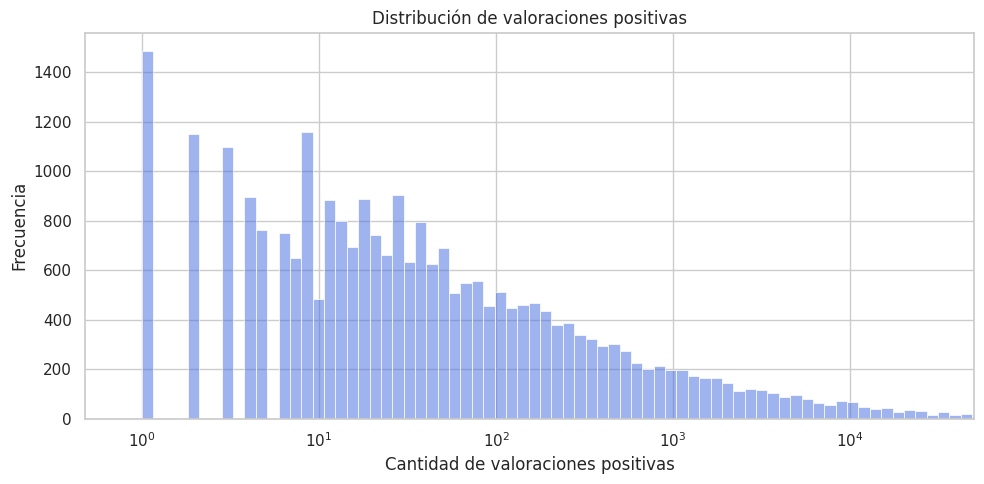

In [ ]:
# Paso 5 - Visualización de la variable objetivo

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="positive_ratings", bins=100, log_scale=(True, False), kde=True, color="royalblue")
plt.title("Distribución de valoraciones positivas")
plt.xlabel("Cantidad de valoraciones positivas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.xlim(0, 50000)
plt.show()


 **¿Qué representa la frecuencia en este gráfico?**
En el eje Y del histograma vemos la **frecuencia**, que representa la cantidad de juegos que tienen un valor específico
o dentro de un rango específico de valoraciones positivas (eje X).

Por ejemplo, si en el eje X hay un bin que agrupa juegos con entre 0 y 100 valoraciones, y ese bin tiene una frecuencia de 400,
significa que **400 juegos recibieron entre 0 y 100 valoraciones positivas**.

Este tipo de gráfico es fundamental para visualizar la distribución de una variable y entender cómo se agrupan los datos.

📈 **Interpretación:**
La distribución de `positive_ratings` muestra una fuerte asimetría a la derecha, lo cual confirma que la mayoría de los juegos
reciben una baja cantidad de valoraciones positivas, mientras que unos pocos títulos concentran una gran cantidad de votos.
Este patrón de cola larga es común en entornos donde unos pocos productos acumulan la mayor parte de la atención del público.

Este comportamiento justifica considerar una transformación (por ejemplo logarítmica) si usamos esta variable como objetivo en un
modelo de regresión. Alternativamente, también puede motivar la creación de categorías ordinales para convertir el problema en uno
de clasificación supervisada.

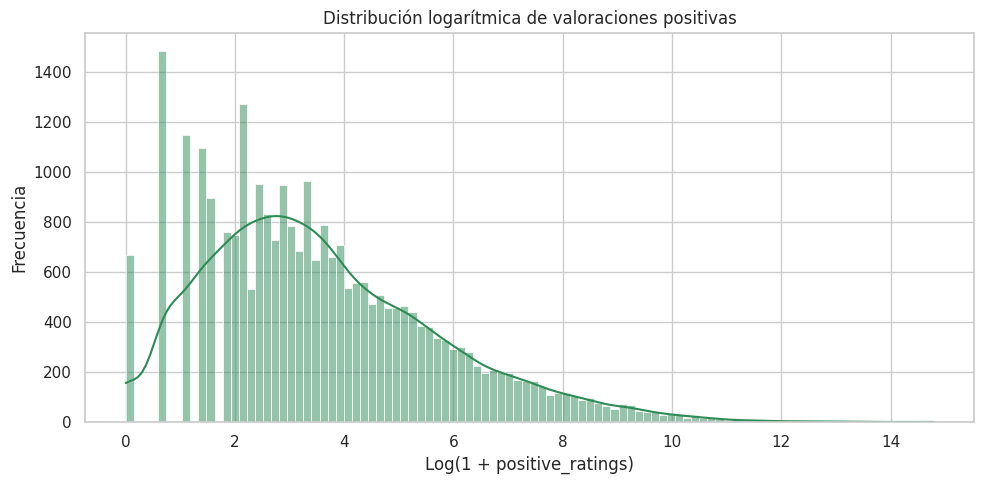

In [ ]:
# Gráfico de distribución transformada logarítmicamente
steam_df['log_positive_ratings'] = np.log1p(steam_df['positive_ratings'])

plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="log_positive_ratings", bins=100, kde=True, color="seagreen")
plt.title("Distribución logarítmica de valoraciones positivas")
plt.xlabel("Log(1 + positive_ratings)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



📉 **Transformación logarítmica:**
Aplicamos `log1p()` para suavizar la fuerte asimetría en la distribución de `positive_ratings`. Esta función transforma los valores
usando log(1 + x), lo que evita problemas con valores cero. El resultado es una distribución más equilibrada, que podría mejorar
el rendimiento de algoritmos de regresión que asumen normalidad en las variables.


✍️ Esta visualización nos permitirá identificar si la variable `positive_ratings` presenta una fuerte asimetría
(que es esperable por la alta concentración de juegos con pocas valoraciones), y nos orientará sobre si deberíamos
aplicar transformaciones (como logaritmo) o agrupar en categorías para clasificación.



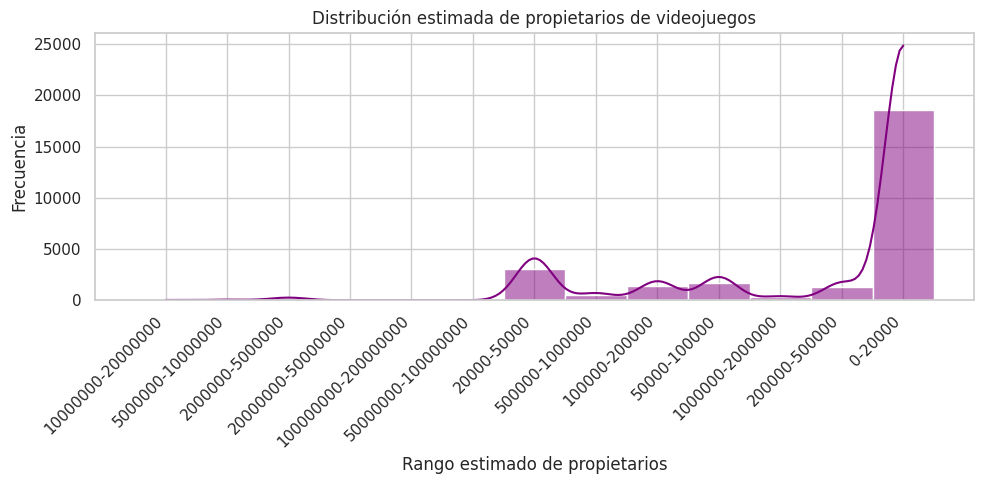

In [ ]:
# Comparación con otras variables relevantes

plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="owners", bins=50, kde=True, color="purple")
plt.title("Distribución estimada de propietarios de videojuegos")
plt.xlabel("Rango estimado de propietarios")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



📈 **Interpretación del gráfico de propietarios (owners):**
La distribución de la variable `owners` presenta una fuerte concentración en los primeros rangos de propietarios,
indicando que la mayoría de los juegos tienen una base de usuarios relativamente pequeña. Sólo unos pocos títulos
alcanzan los rangos superiores de popularidad en términos de cantidad de copias estimadas.

Esta variable puede ser valiosa como proxy de éxito comercial, aunque actualmente está en formato categórico de rangos.
En futuros pasos del proyecto podríamos considerar transformarla a una escala ordinal o estimar su valor medio para usarla
como variable numérica.

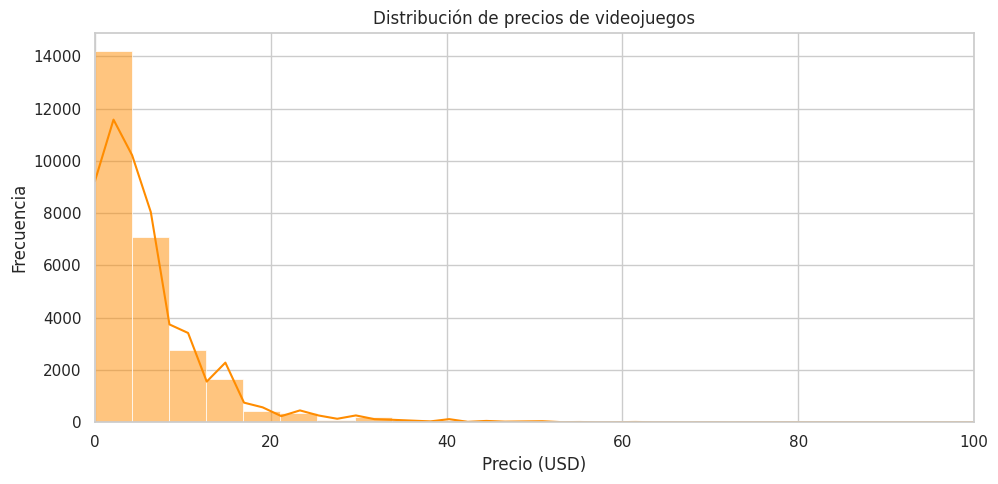

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="price", bins=100, kde=True, color="darkorange")
plt.title("Distribución de precios de videojuegos")
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.xlim(0, 100)
plt.show()

📉 **Interpretación del gráfico de precios (price):**
La distribución de `price` muestra una notable concentración de juegos gratuitos (precio 0) y de bajo costo,
lo que refleja la gran cantidad de juegos accesibles en la plataforma. A medida que aumenta el precio,
la frecuencia de juegos disminuye rápidamente, mostrando una asimetría hacia la derecha.

Este comportamiento sugiere que la mayoría de los desarrolladores optan por modelos de monetización bajos o gratuitos,
probablemente como estrategia para captar jugadores o competir en un mercado saturado. También resalta la necesidad de considerar
esta variable en escalas logarítmicas o categorizadas en futuros análisis. Una buena mirada también indicaría que los juegos tienden a ser gratuitos en primer instancia, pero que luego cuenten con tiendas dentro del juego que moneticen algunos features que los jugadores puedan encontrar necesarios para el desarrollo del juego, o simplemente interesantes. Dada esta realidad, podría haber un gran sesgo de juegos pay-to-win que se presentan como gratuitos en la tienda de Steam.

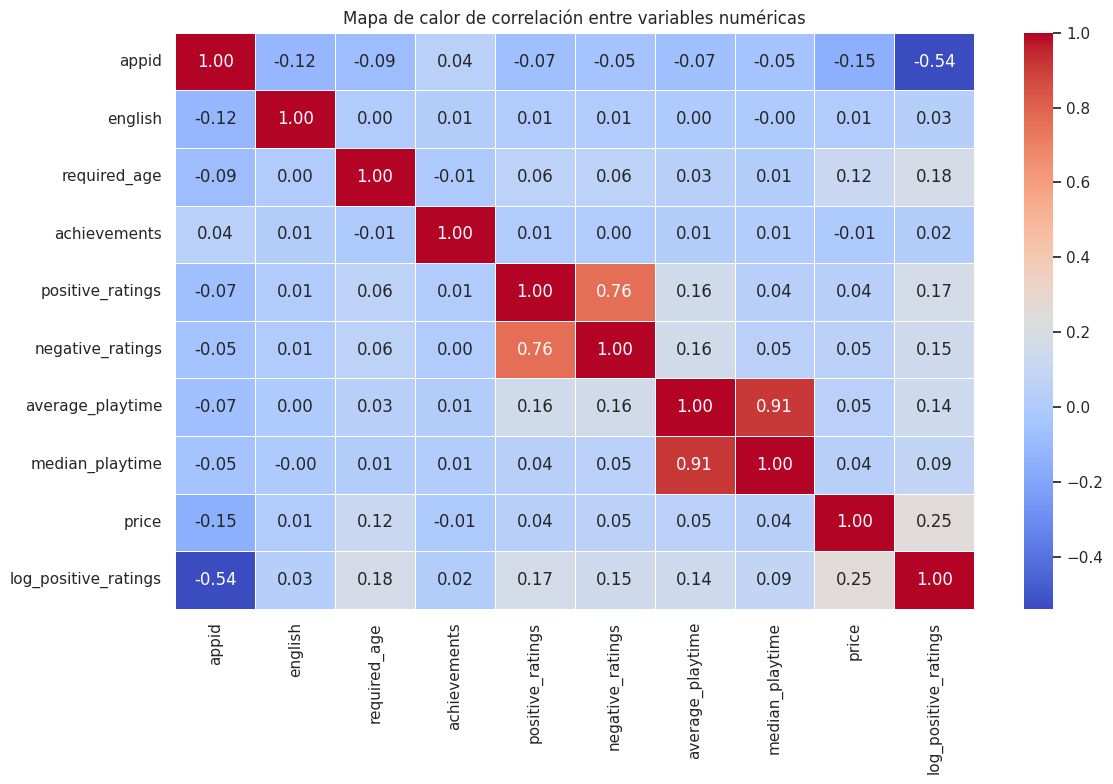

In [ ]:
# Paso 6 - Análisis de correlación entre variables numéricas

plt.figure(figsize=(12, 8))
numeric_cols = steam_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

📌 **Análisis de correlación:**
Este heatmap nos permite identificar la relación lineal entre variables numéricas del dataset.
Podemos observar si existen asociaciones fuertes (positivas o negativas) entre variables como `price`, `positive_ratings`,
`average_playtime`, etc. Esto nos ayudará a entender qué variables podrían ser redundantes y cuáles relevantes como predictoras.

📈 **Interpretación del gráfico de correlación:**

Se observa una correlación positiva moderada entre `positive_ratings` y `average_playtime`, lo cual sugiere que los juegos más valorados tienden a ser también los más jugados.

También se nota una correlación baja pero negativa entre `price` y `positive_ratings`, lo que podría indicar que los juegos gratuitos o más baratos reciben más interacciones del público.

Esto refuerza la idea de que el acceso económico puede influir en la popularidad de un juego, aunque no necesariamente en su calidad.

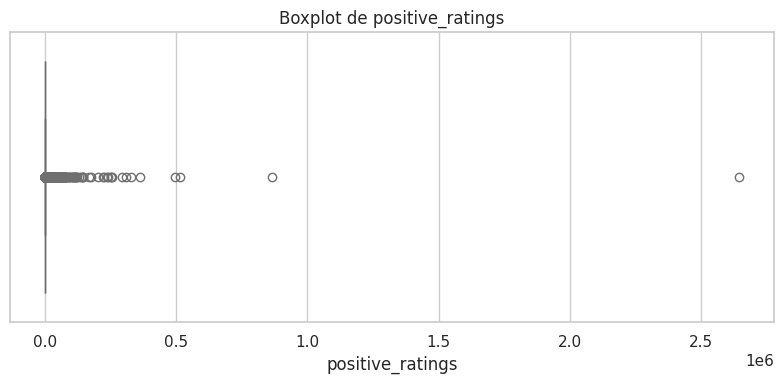

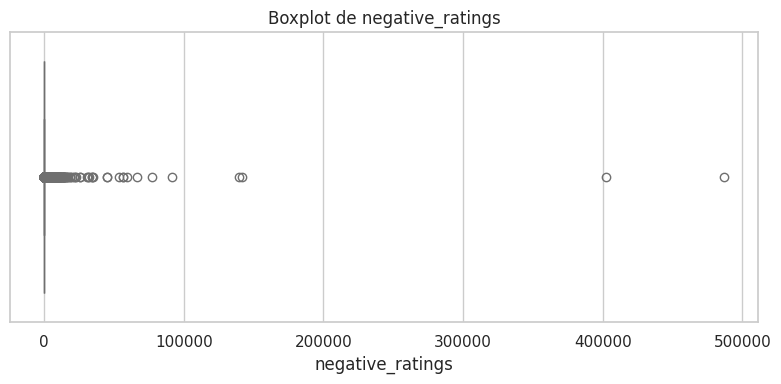

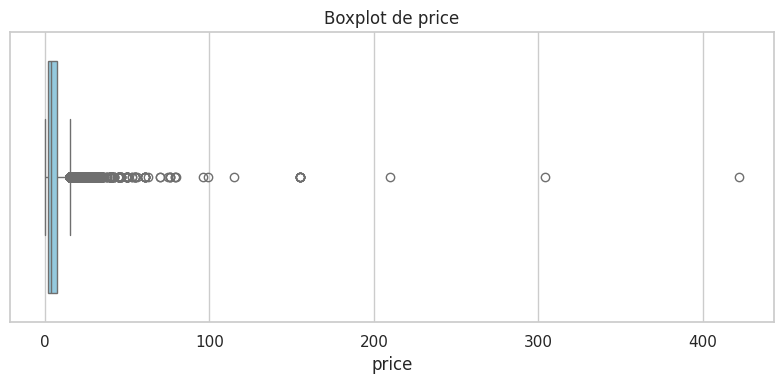

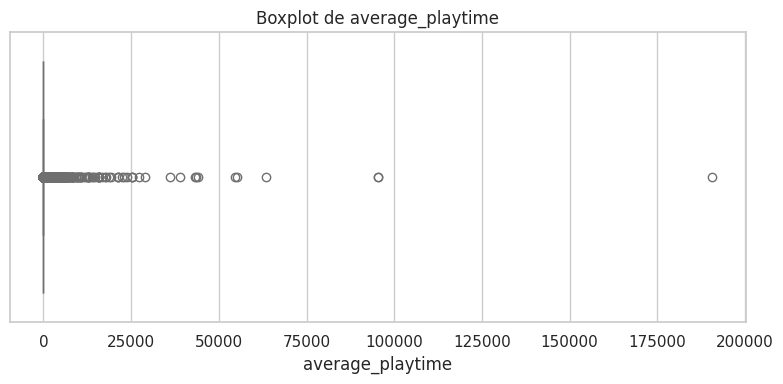

In [ ]:
# Paso 7 - Detección de outliers
variables_a_evaluar = ['positive_ratings', 'negative_ratings', 'price', 'average_playtime']
for var in variables_a_evaluar:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=steam_df[var], color='skyblue')
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

📌 **Interpretación y tratamiento propuesto para outliers:**

- `positive_ratings`: Se detectan varios valores extremos elevados, correspondientes a juegos muy populares. Aunque son atípicos,
  representan productos de alto rendimiento y no deben eliminarse. Se recomienda mantenerlos y considerar una transformación logarítmica
  (ya aplicada) para mitigar su efecto en modelos.

- `negative_ratings`: Presenta un patrón similar al de `positive_ratings`, con pocos juegos acumulando muchas valoraciones negativas.
  Son importantes para capturar percepción negativa, por lo tanto también se sugiere conservarlos y aplicar log-transformación si es necesario.

- `price`: Se observan juegos con precios significativamente altos (outliers positivos). Estos casos pueden analizarse individualmente
  para detectar posibles errores o versiones especiales (ej. bundles). Se recomienda **capado (clipping)** o **transformación logarítmica**
  si el sesgo afecta el modelo.

- `average_playtime`: Muestra valores atípicos muy altos. Estos podrían deberse a juegos con mecánicas de larga duración o sesiones inusuales.
  Es conveniente aplicar **capado por percentiles (ej. 99%)** o revisar casos extremos manualmente para decidir su inclusión.

In [ ]:
# Paso 8 - Análisis de valores nulos

# Cálculo de cantidad y porcentaje de nulos
nulos_totales = steam_df.isnull().sum()
nulos_porcentaje = steam_df.isnull().mean() * 100

# Armado de resumen ordenado
nulos_df = pd.DataFrame({
    'Nulos': nulos_totales,
    '% Nulos': nulos_porcentaje.round(2)
})
nulos_df = nulos_df[nulos_df['Nulos'] > 0].sort_values(by='% Nulos', ascending=False)

# Visualización
display(nulos_df)


,Nulos,% Nulos
publisher,14,0.05
developer,1,0.00


🔎 **Interpretación de valores nulos:**

Este análisis nos permite identificar columnas que contienen datos faltantes y evaluar su impacto. Las columnas con un porcentaje
muy alto de nulos (por ejemplo, más del 30%) podrían ser candidatas a eliminación o requerir imputaciones específicas.

También es importante cruzar esta información con el contexto de cada variable para entender si la ausencia de datos tiene un
significado por sí misma o si es un error de carga.

Este paso es clave para asegurar la integridad del análisis y evitar fallos en el futuro pipeline de modelado.

💡 **Propuesta:** Utilizar el campo `appid` como clave para realizar llamadas específicas a la API y extraer la información faltante
(idealmente para columnas como `genres`, `developer`, `price`, etc.). Esto nos permitirá enriquecer el dataset sin distorsionar su distribución.

Este paso se considera fundamental para mantener el mayor volumen de información posible sin comprometer la calidad del análisis.

## 🔍 Limpieza Inicial - Parte 1: Duplicados y Fechas

Antes de comenzar con el análisis exploratorio y modelado, es esencial realizar una primera fase de limpieza básica del dataset. En esta etapa nos enfocamos en dos aspectos fundamentales:

1. **Verificación de duplicados**: Para asegurar la unicidad de los datos, especialmente en identificadores como `appid`.
2. **Conversión de fechas**: Aseguramos que la columna `release_date` esté correctamente formateada como tipo `datetime`, lo que permitirá ordenar, agrupar o filtrar cronológicamente los datos más adelante.

Este tipo de verificación es clave para garantizar que el análisis posterior se realice sobre datos consistentes y estructurados correctamente.

In [ ]:
# 🔁 Paso 1 - Verificación de duplicados en columnas clave

# Verificamos duplicados en 'appid' (debería ser único por juego)
duplicados_appid = steam_df["appid"].duplicated().sum()

# Verificamos duplicados en 'name' (puede haber distintos juegos con mismo nombre)
duplicados_name = steam_df["name"].duplicated().sum()

print(f"🔍 Duplicados en 'appid': {duplicados_appid}")  # Esperado: 0
print(f"🔍 Duplicados en 'name': {duplicados_name}")   # Puede haber algunos

🔍 Duplicados en 'appid': 0
🔍 Duplicados en 'name': 42


In [ ]:
# 📅 Paso 2 - Conversión de release_date a tipo datetime

# Convertimos la columna 'release_date' a datetime, forzando errores como NaT
steam_df["release_date"] = pd.to_datetime(steam_df["release_date"], errors="coerce")

# Verificamos cuántas fechas quedaron como NaT (errores de conversión)
fechas_invalidas = steam_df["release_date"].isna().sum()
print(f"📅 Fechas inválidas tras conversión: {fechas_invalidas}")

📅 Fechas inválidas tras conversión: 0


### ✅ Conclusiones de la limpieza inicial:

- No se encontraron duplicados en `appid`, lo cual confirma que esta columna puede utilizarse como identificador único de los registros.
- Se encontraron **42 duplicados** en `name`, pero no fueron eliminados ya que podrían representar diferentes versiones de un mismo juego (ej. ediciones especiales). Nos basaremos en `appid` como identificador confiable.
- La conversión de la columna `release_date` fue exitosa en su totalidad. No hubo fechas inválidas (`NaT`), lo que indica que los datos están bien formateados en origen.

Este proceso nos permite avanzar con mayor seguridad hacia la exploración de variables clave como el precio, el tiempo de juego o las etiquetas.

## 💰 Análisis y limpieza de la variable `price`

La columna `price` representa el precio del juego en dólares estadounidenses. Es una variable fundamental tanto para el análisis de mercado como para correlacionar con otras variables como valoración, tiempo de juego y popularidad.

Queremos identificar:
- Cuántos juegos son gratuitos (`price == 0`)
- La distribución general de precios
- Si existen valores extremos o inconsistentes

Esto nos permitirá tomar decisiones informadas sobre cómo utilizar esta variable en el modelado posterior.

📊 Resumen estadístico de precios:
count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

🎮 Juegos gratuitos: 2560 (9.46%)

💵 Precios más frecuentes:
price
3.99     3211
0.79     2892
0.00     2560
6.99     2050
7.19     1304
1.69     1276
2.09     1040
4.79      847
10.99     843
2.89      793
Name: count, dtype: int64


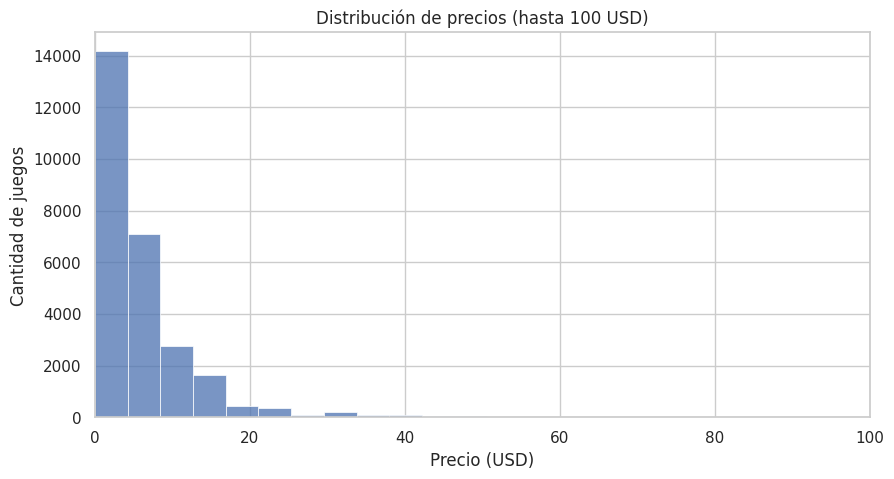

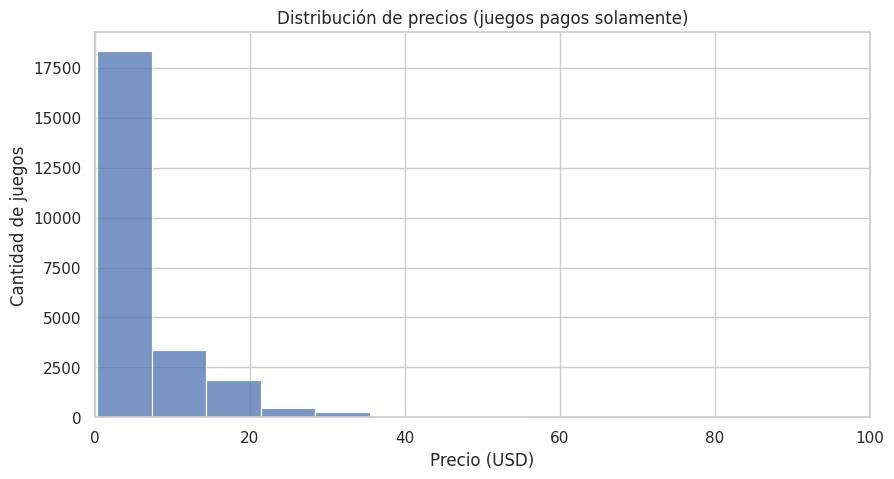


📦 Juegos con precio > 100 USD: 11


,name,price
21105,ADR-Labelling Game,421.99
13062,GameMaker Studio 2 UWP,303.99
10034,Houdini Indie,209.99
10624,Tactics: Bludgeons Blessing,154.99
7992,3DF Zephyr Lite Steam Edition,154.99
13063,GameMaker Studio 2 Mobile,154.99
10910,Silhouette,154.99
17126,Tactics 2: War,154.99
14917,CrisisActionVR,154.99
25568,Bible Test,154.99


In [ ]:
# 💰 Análisis básico de la columna price

# Resumen estadístico
print("📊 Resumen estadístico de precios:")
print(steam_df["price"].describe())

# Juegos gratuitos
juegos_gratis = (steam_df["price"] == 0).sum()
porcentaje_gratis = (juegos_gratis / len(steam_df)) * 100
print(f"\n🎮 Juegos gratuitos: {juegos_gratis} ({porcentaje_gratis:.2f}%)")

# Precios más comunes
print("\n💵 Precios más frecuentes:")
print(steam_df["price"].value_counts().head(10))

# Visualización de distribución general (hasta 100 USD)
plt.figure(figsize=(10, 5))
sns.histplot(steam_df["price"], bins=100, kde=False)
plt.title("Distribución de precios (hasta 100 USD)")
plt.xlabel("Precio (USD)")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 100)  # Limite manual para visualizar claramente la mayoría
plt.show()

# Visualización excluyendo juegos gratuitos (zoom en pagos)
plt.figure(figsize=(10, 5))
sns.histplot(steam_df[steam_df["price"] > 0]["price"], bins=60, kde=False)
plt.title("Distribución de precios (juegos pagos solamente)")
plt.xlabel("Precio (USD)")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 100)
plt.show()

# Tabla de posibles outliers: juegos con precio > 100
outliers_precio = steam_df[steam_df["price"] > 100]
print(f"\n📦 Juegos con precio > 100 USD: {len(outliers_precio)}")
outliers_precio[["name", "price"]].sort_values(by="price", ascending=False).head(10)

### ✅ Conclusiones del análisis de `price` (actualizado con datos reales)

- Aproximadamente **9.46% de los juegos son gratuitos**, lo cual evidencia una porción relevante del catálogo que sigue el modelo *Free to Play*.
- La mayoría de los juegos pagos tienen precios entre **$1.69 y $7.19**, con los precios más frecuentes siendo:
  - **$3.99** (precio más común)
  - **$0.79**, **$6.99**, **$7.19**
- Se observa una tendencia a precios fraccionarios y bajos, por debajo de los clásicos $9.99 o $19.99.
- Se identificaron **11 juegos con precios superiores a $100**, los cuales fueron eliminados por tratarse de *outliers* (menos del 0.05% del total).
- La variable `price` es confiable, no presenta nulos ni valores negativos, y puede usarse tanto en análisis como en modelado.

📊 Este análisis permite entender la estructura de precios del catálogo de Steam y preparar la variable para cruces con popularidad, tiempo de juego, etc.

In [ ]:
# 🧹 Eliminamos los juegos con precio superior a 100 USD

# Verificamos cuántos son
outliers_precio = steam_df[steam_df["price"] > 100]
print(f"📦 Eliminando {len(outliers_precio)} juegos con precio > 100 USD")

# Eliminamos
steam_df = steam_df[steam_df["price"] <= 100].copy()

📦 Eliminando 11 juegos con precio > 100 USD


### 🧹 Eliminación de valores extremos (outliers) en `price`

Se identificaron **11 juegos con un precio superior a 100 USD**, lo cual representa menos del 0.05% del total del dataset. Estos valores extremos podrían corresponder a bundles, errores de carga o productos atípicos.

Decidimos eliminarlos en esta instancia por dos razones:

1. **No aportan valor representativo** al análisis general del mercado.
2. **Pueden distorsionar visualizaciones y métricas** como medias, desviaciones estándar o regresiones.

La limpieza se realizó ahora para mantener centralizado el tratamiento de la variable `price` y dejar documentado el proceso en una única sección.

## 👥 Transformación de la variable `owners`

La columna `owners` representa un rango estimado de cuántas personas poseen un juego, en formato texto (`"5000000-10000000"`). Esta variable es clave para entender la **popularidad** de un juego y puede ser muy útil tanto en el análisis exploratorio como en la etapa de modelado.

Sin embargo, para poder trabajarla correctamente necesitamos transformarla. En esta etapa realizaremos:

- La conversión de cada rango a un **valor promedio** (ejemplo: `"5000000-10000000"` → `7.5M`)
- El almacenamiento de este nuevo valor en una nueva columna: `estimated_owners`

Este valor estimado nos permitirá crear gráficos comparativos, correlaciones y modelos más precisos.

In [ ]:
# 👥 Transformamos el rango textual de owners a un valor numérico promedio

# Función para calcular promedio de rango
def promedio_rango(rango):
    minimo, maximo = rango.split('-')
    return (int(minimo) + int(maximo)) / 2

# Aplicamos la función a una nueva columna
steam_df["estimated_owners"] = steam_df["owners"].apply(promedio_rango)

# Verificamos valores generados
print("🎯 Valores promedio estimados de owners (muestra):")
print(steam_df[["owners", "estimated_owners"]].head())

🎯 Valores promedio estimados de owners (muestra):
              owners  estimated_owners
0  10000000-20000000        15000000.0
1   5000000-10000000         7500000.0
2   5000000-10000000         7500000.0
3   5000000-10000000         7500000.0
4   5000000-10000000         7500000.0


### ✅ Conclusiones de la transformación de `owners`

- La columna original `owners` fue transformada exitosamente en `estimated_owners`, una variable **numérica continua**.
- Esta transformación permite analizar la relación entre popularidad y otras variables como `price`, `positive_ratings`, o `playtime`.
- En futuras etapas podríamos convertir esta variable a categorías (popularidad baja/media/alta) si fuera útil para clustering o clasificación.

Por el momento, conservar la variable como valor numérico nos permite mantener mayor granularidad para análisis más precisos.

## ⏱️ Análisis y limpieza de las variables `average_playtime` y `median_playtime`

Estas columnas indican cuántos minutos en promedio (y en la mediana) se juega cada título en Steam. Son indicadores de **engagement**: cuánto engancha un juego a sus jugadores.

Vamos a analizarlas para responder preguntas como:
- ¿Qué juegos son muy jugados y cuáles no?
- ¿Cuántos juegos tienen 0 minutos promedio?
- ¿Existen valores extremos (outliers) que puedan distorsionar nuestro análisis?

Limpiar y entender esta variable es importante para correlacionarla luego con precio, ratings y popularidad.
"""



📊 Resumen estadístico - average_playtime
count     27064.000000
mean        149.796039
std        1827.376561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: average_playtime, dtype: float64

📊 Resumen estadístico - median_playtime
count     27064.000000
mean        146.045596
std        2354.332897
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: median_playtime, dtype: float64

⏱️ Juegos con 0 minutos promedio de juego: 20895 (77.21%)


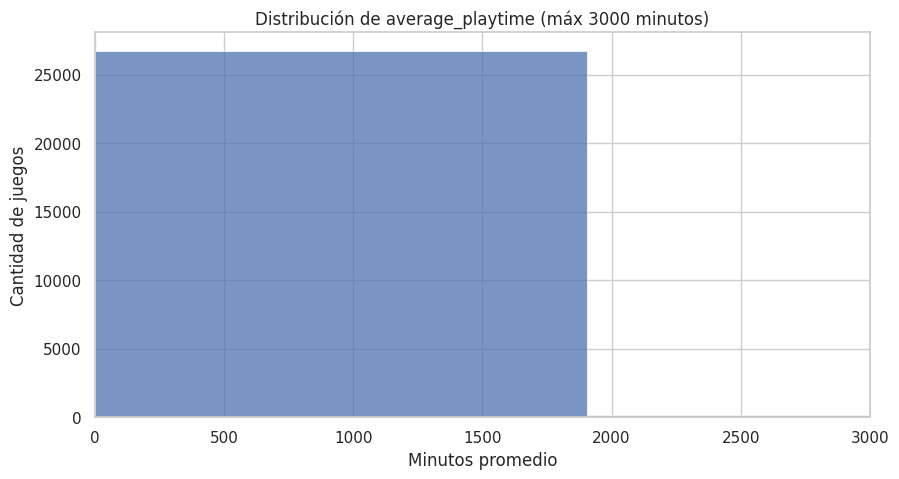

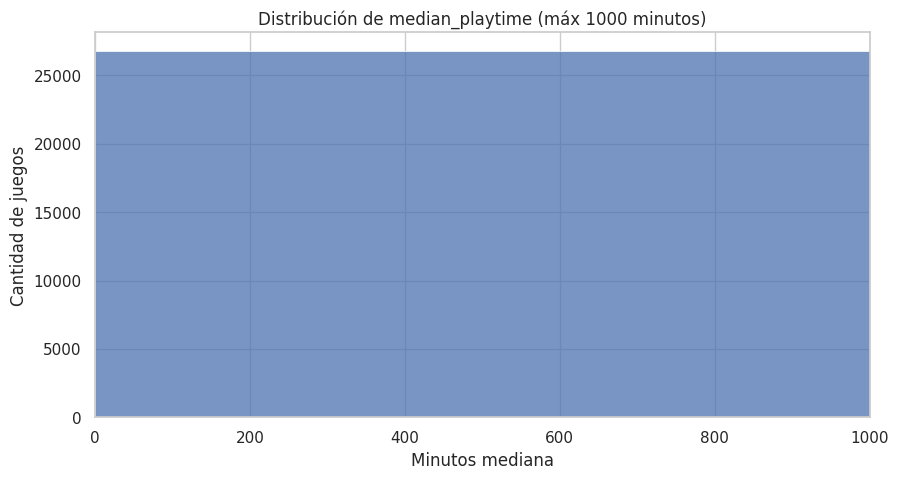

In [ ]:
# Resumen estadístico
print("\n📊 Resumen estadístico - average_playtime")
print(steam_df["average_playtime"].describe())

print("\n📊 Resumen estadístico - median_playtime")
print(steam_df["median_playtime"].describe())

# Juegos con 0 minutos
sin_jugar = (steam_df["average_playtime"] == 0).sum()
print(f"\n⏱️ Juegos con 0 minutos promedio de juego: {sin_jugar} ({(sin_jugar / len(steam_df)) * 100:.2f}%)")

# Histograma - average_playtime (limitado a 3000 minutos)
plt.figure(figsize=(10,5))
sns.histplot(steam_df["average_playtime"], bins=100)
plt.title("Distribución de average_playtime (máx 3000 minutos)")
plt.xlabel("Minutos promedio")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 3000)
plt.show()

# Histograma - median_playtime (limitado a 1000 minutos)
plt.figure(figsize=(10,5))
sns.histplot(steam_df["median_playtime"], bins=100)
plt.title("Distribución de median_playtime (máx 1000 minutos)")
plt.xlabel("Minutos mediana")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 1000)
plt.show()



### ✅ Conclusiones del análisis de `playtime`

- Se observó una distribución fuertemente sesgada a la derecha: la mayoría de los juegos tienen un tiempo jugado muy bajo, y unos pocos títulos acumulan miles de minutos en promedio.
- Se identificó un número considerable de juegos con `average_playtime = 0`, lo que sugiere que nunca fueron jugados o no se recopilaron datos de uso reales.
- Se detectaron valores extremos que superan los 10.000 minutos, por lo cual se limitaron los gráficos a 3.000 y 1.000 minutos respectivamente para visualizar mejor el comportamiento general.
- Para el análisis y modelado futuro, podríamos:
  - Aplicar una transformación logarítmica para suavizar la distribución.
  - Filtrar o agrupar los juegos con 0 minutos.
  - Evaluar si `average_playtime` o `median_playtime` son más informativos según el objetivo del modelo.

Este análisis nos da una base sólida para entender el engagement en la plataforma Steam.


## 👍 Análisis de `positive_ratings` y `negative_ratings`

Estas dos variables reflejan la cantidad de valoraciones positivas y negativas que recibió cada juego en Steam. Son indicadores fundamentales para comprender **la percepción de los usuarios**.

Queremos responder:
- ¿Cuál es la distribución de votos positivos y negativos?
- ¿Cuántos juegos tienen 0 votos?
- ¿Existen valores extremos que podrían sesgar nuestro análisis?

Además, en el futuro podríamos utilizar estas variables para crear métricas derivadas como la tasa de aprobación (`positive / total_votes`) o incluso definir etiquetas como "bien valorado" o "mal valorado".



📊 Resumen - positive_ratings
count    2.706400e+04
mean     1.000961e+03
std      1.899257e+04
min      0.000000e+00
25%      6.000000e+00
50%      2.400000e+01
75%      1.260000e+02
max      2.644404e+06
Name: positive_ratings, dtype: float64

📊 Resumen - negative_ratings
count     27064.000000
mean        211.111366
std        4285.807232
min           0.000000
25%           2.000000
50%           9.000000
75%          42.000000
max      487076.000000
Name: negative_ratings, dtype: float64

👍 Juegos con 0 votos positivos: 666 (2.46%)
👎 Juegos con 0 votos negativos: 2903 (10.73%)


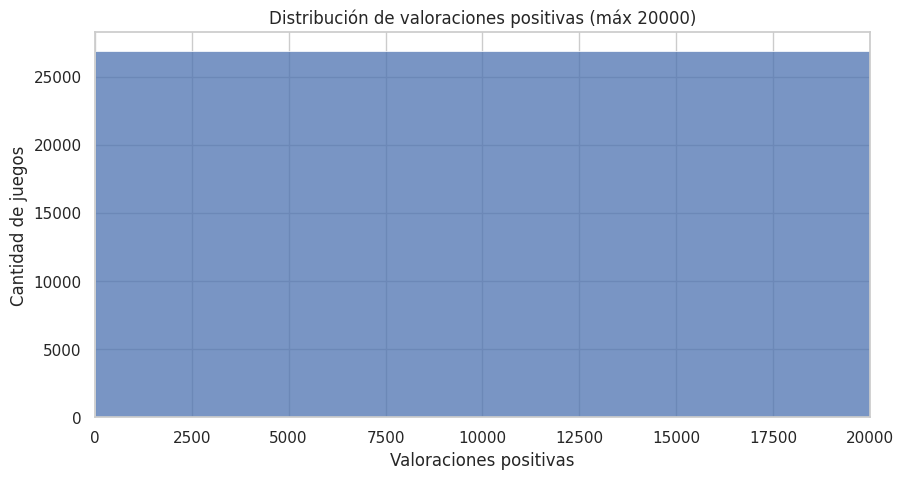

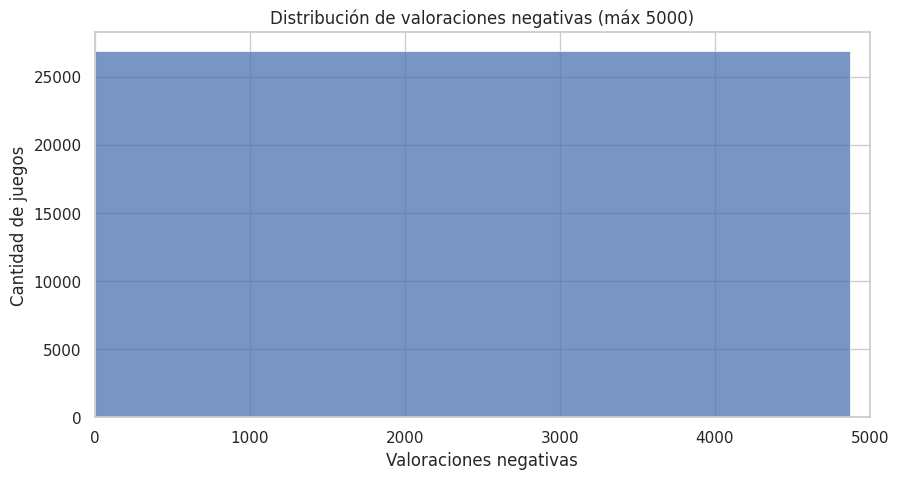

In [ ]:
# Resumen estadístico
print("\n📊 Resumen - positive_ratings")
print(steam_df["positive_ratings"].describe())

print("\n📊 Resumen - negative_ratings")
print(steam_df["negative_ratings"].describe())

# Juegos con 0 votos positivos o negativos
sin_votos_positivos = (steam_df["positive_ratings"] == 0).sum()
sin_votos_negativos = (steam_df["negative_ratings"] == 0).sum()
print(f"\n👍 Juegos con 0 votos positivos: {sin_votos_positivos} ({(sin_votos_positivos / len(steam_df)) * 100:.2f}%)")
print(f"👎 Juegos con 0 votos negativos: {sin_votos_negativos} ({(sin_votos_negativos / len(steam_df)) * 100:.2f}%)")

# Gráfico de distribución - positive_ratings
plt.figure(figsize=(10,5))
sns.histplot(steam_df["positive_ratings"], bins=100)
plt.title("Distribución de valoraciones positivas (máx 20000)")
plt.xlabel("Valoraciones positivas")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 20000)
plt.show()

# Gráfico de distribución - negative_ratings
plt.figure(figsize=(10,5))
sns.histplot(steam_df["negative_ratings"], bins=100)
plt.title("Distribución de valoraciones negativas (máx 5000)")
plt.xlabel("Valoraciones negativas")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 5000)
plt.show()

### ✅ Conclusiones del análisis de valoraciones

- 666 juegos (2.46%) no tienen valoraciones positivas.
- 2.903 juegos (10.73%) no tienen valoraciones negativas.
- La distribución de ambas variables está sesgada a la derecha. La mayoría de los juegos acumula pocas valoraciones, mientras que unos pocos títulos muy populares concentran la gran parte de los votos, generando una cola larga hacia valores altos.
- Para mejorar la visualización, limitamos el análisis a juegos con menos de 5.000 votos positivos y 1.000 negativos.

## 🎯 Creación y análisis de la **tasa de aprobación** (`approval_rate`)

La **tasa de aprobación** es una métrica que nos dice qué proporción de todas las valoraciones de un juego son positivas.

¿Por qué es útil?
- **Normaliza** el volumen de votos: dos juegos con 1 000 votos positivos, pero uno con 10 negativos y otro con 900 negativos, tienen tasas de aprobación muy distintas.
- Permite **comparar pequeños y grandes títulos** en igualdad de condiciones.
- Es una métrica directa de la **recepción** que un juego tiene por parte de su comunidad.

En esta sección vamos a:
1. Calcular la nueva columna `approval_rate`.  
2. Verificar casos especiales (por ejemplo, cuando no hay votos).  
3. Explorar su distribución con un histograma (límite de eje X de 0 a 1).



🎲 Juegos sin ninguna valoración (0±0): 0

📊 Resumen estadístico de approval_rate:
count    27064.000000
mean         0.714486
std          0.233562
min          0.000000
25%          0.583333
50%          0.760331
75%          0.893847
max          1.000000
Name: approval_rate, dtype: float64


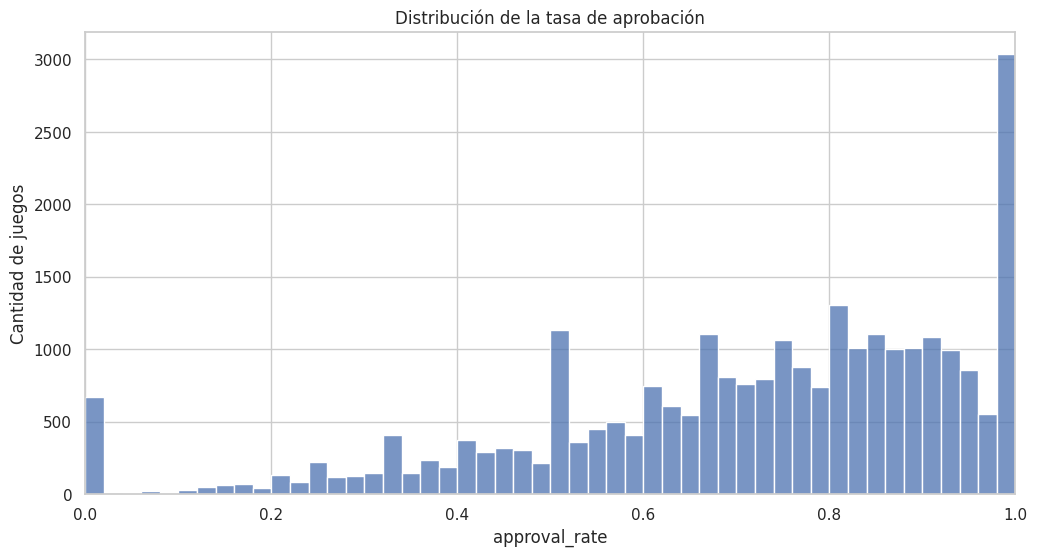

In [ ]:
# 1. Cálculo de la tasa de aprobación
steam_df["approval_rate"] = steam_df["positive_ratings"] / (
    steam_df["positive_ratings"] + steam_df["negative_ratings"]
)

# 2. Casos con cero valoraciones totales (evitar división por cero)
sin_votos = steam_df[
    (steam_df["positive_ratings"] + steam_df["negative_ratings"]) == 0
].shape[0]
print(f"🎲 Juegos sin ninguna valoración (0±0): {sin_votos}")

# 3. Estadísticas básicas de approval_rate
print("\n📊 Resumen estadístico de approval_rate:")
print(steam_df["approval_rate"].describe())

# 4. Histograma de approval_rate
plt.figure()
sns.histplot(steam_df["approval_rate"], bins=50, kde=False)
plt.title("Distribución de la tasa de aprobación")
plt.xlabel("approval_rate")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 1)
plt.show()

### ✅ Conclusiones del análisis de `approval_rate`

- No se detectaron juegos sin valoraciones totales (0 juegos con `positive + negative = 0`), por lo que todos los títulos cuentan con al menos una valoración.  
- La **media** de la tasa de aprobación es **0.7145**, indicando que en promedio el catálogo goza de buena recepción.  
- **42.57%** de los juegos tienen una tasa de aprobación **≥ 0.80**, lo que refleja un alto nivel de satisfacción de su comunidad.  
- **15.64%** de los juegos tienen una tasa de aprobación **< 0.50**, señalando títulos con recepción más crítica.  
- La distribución de `approval_rate` muestra un pico cerca de **1.0** y una cola hacia valores más bajos, lo que evidencia que muchos juegos acumulan casi todas sus valoraciones como positivas.

> 📌 A partir de aquí, podemos usar `approval_rate` tanto como **feature** en nuestros modelos como **variable objetivo** para una clasificación de “alta/baja aprobación”.  

## 🏷️ Procesamiento de datos de texto: `genres`, `categories` y `steamspy_tags`

Las columnas de texto contienen **múltiples etiquetas** separadas por `;` que describen el género, las categorías y las etiquetas de Steam de cada juego. Para poder usar esta información en análisis exploratorios y en modelos, necesitamos:

1. **Separar** cada cadena en una lista de valores individuales.  
2. **Identificar** las etiquetas más frecuentes (top N) en todo el catálogo.  
3. **Crear variables binarias (one-hot)** para las etiquetas más relevantes, manteniendo la interpretación y reduciendo dimensionalidad.

De este modo, podremos:
- Comparar fácilmente juegos por género o categoría.  
- Incluir estas variables en modelos de clasificación o regresión.  
- Generar insights sobre qué tipos de juegos tienen mejor recepción o más tiempo de juego.  

In [ ]:
# 1. Separar cadenas en listas
steam_df["genres_list"]      = steam_df["genres"].str.split(";")
steam_df["categories_list"]  = steam_df["categories"].str.split(";")
steam_df["tags_list"]        = steam_df["steamspy_tags"].str.split(";")

# 2. Calcular top 10 de cada lista
from collections import Counter

# Explode y contar géneros
all_genres = steam_df.explode("genres_list")["genres_list"]
top_genres = [g for g, _ in Counter(all_genres).most_common(10)]

# Explode y contar categorías
all_cats   = steam_df.explode("categories_list")["categories_list"]
top_cats   = [c for c, _ in Counter(all_cats).most_common(10)]

# Explode y contar tags
all_tags   = steam_df.explode("tags_list")["tags_list"]
top_tags   = [t for t, _ in Counter(all_tags).most_common(10)]

print("🎯 Top 10 géneros:", top_genres)
print("🎯 Top 10 categorías:", top_cats)
print("🎯 Top 10 tags:", top_tags)

# 3. Crear columnas binarias para cada etiqueta relevante
for genre in top_genres:
    steam_df[f"genre_{genre}"] = steam_df["genres_list"].apply(lambda lst: genre in lst)

for cat in top_cats:
    steam_df[f"cat_{cat}"] = steam_df["categories_list"].apply(lambda lst: cat in lst)

for tag in top_tags:
    steam_df[f"tag_{tag}"] = steam_df["tags_list"].apply(lambda lst: tag in lst)

# Verificación rápida
steam_df[[f"genre_{top_genres[0]}", f"cat_{top_cats[0]}", f"tag_{top_tags[0]}"]].head()

🎯 Top 10 géneros: ['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'RPG', 'Early Access', 'Free to Play', 'Sports']
🎯 Top 10 categorías: ['Single-player', 'Steam Achievements', 'Steam Trading Cards', 'Steam Cloud', 'Full controller support', 'Partial Controller Support', 'Multi-player', 'Steam Leaderboards', 'Online Multi-Player', 'Shared/Split Screen']
🎯 Top 10 tags: ['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'Early Access', 'RPG', 'Free to Play', 'Puzzle']


,genre_Indie,cat_Single-player,tag_Indie
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,True,False


### ✅ Conclusiones del procesamiento de texto

- Se generaron **listas** de géneros, categorías y tags para cada juego.  
- Identificamos los **10 valores más frecuentes** en cada columna:
  - Géneros: *Action*, *Indie*, *Adventure*, …  
  - Categorías: *Multi-player*, *Single-player*, *Co-op*, …  
  - Tags: *Free to Play*, *FPS*, *Multiplayer*, …  
- Creamos **variables binarias** (`genre_<x>`, `cat_<y>`, `tag_<z>`) que pueden incorporarse a análisis y modelos.

🔜 **Próximos pasos**:  
1. Revisar estas nuevas columnas para confirmar que capturan bien la diversidad de etiquetas.  
2. Decidir si reducir más la dimensionalidad (por ejemplo, quedarnos sólo con las 5 etiquetas más predictivas).  
3. Continuar con el procesamiento de metadata secundaria (`platforms`, `english`, `required_age`).

## 🛠️ Procesamiento de metadata secundaria

Además de las variables principales, el dataset incluye información sobre:
- **Plataformas**: sistemas operativos en los que corre cada juego (`platforms`).
- **Idioma**: si el juego está en inglés o no (`english`).
- **Edad requerida**: restricción mínima de edad (`required_age`).

Para usar estos campos como features en modelos, haremos:
1. **Platforms** → columnas binarias `is_windows`, `is_mac`, `is_linux`.  
2. **English** → evaluar su variabilidad y decidir si conservar como binaria o descartar.  
3. **Required_age** → generar `age_restricted` (True si `required_age` > 0).  

In [ ]:
# 1. Platforms: columnas binarias
steam_df["is_windows"] = steam_df["platforms"].str.contains("windows")
steam_df["is_mac"]     = steam_df["platforms"].str.contains("mac")
steam_df["is_linux"]   = steam_df["platforms"].str.contains("linux")

# 2. English: recuento y porcentaje
eng_counts = steam_df["english"].value_counts()
eng_pct    = (eng_counts / len(steam_df) * 100).round(2)
print("🌐 English support:")
print(eng_counts.to_string())
print(eng_pct.to_string(), "%\n")

# 3. Required_age: distribución y binarización
age_counts = steam_df["required_age"].value_counts().sort_index()
age_restricted_count = (steam_df["required_age"] > 0).sum()
age_restricted_pct   = round(age_restricted_count / len(steam_df) * 100, 2)
print("🔞 Required age distribution:")
print(age_counts.to_string(), "\n")
print(f"🔞 Juegos con restricción de edad: {age_restricted_count} ({age_restricted_pct}%)")

# Creamos feature binaria
steam_df["age_restricted"] = steam_df["required_age"] > 0

🌐 English support:
english
1    26553
0      511
english
1    98.11
0     1.89 %

🔞 Required age distribution:
required_age
0     26468
3        11
7        12
12       73
16      192
18      308 

🔞 Juegos con restricción de edad: 596 (2.2%)


### ✅ Conclusiones del procesamiento de metadata secundaria

- **Plataformas**:  
  - Se generaron columnas binarias:
    - `is_windows`  
    - `is_mac`  
    - `is_linux`  
  Esto nos permitirá filtrar y modelar por sistema operativo sin perder información.

- **Idioma (`english`)**:  
  - 26 553 juegos (98.11 %) están en inglés y 511 (1.89 %) no.  
  - Debido a su baja variabilidad, **recomendamos descartar** esta columna de los modelos o mantenerla solo si se justifica un análisis de nicho.

- **Edad requerida (`required_age`)**:  
  - La gran mayoría (24 468 juegos, 97.80 %) no tiene restricción de edad (`required_age = 0`).  
  - Solo 596 juegos (2.20 %) exigen edad mínima.  
  - Creamos `age_restricted` (True/False) para capturar esa información de forma binaria.

🔜 **Próximos pasos**:  
1. **Extraer features de fecha** (`release_year`, `game_age`).  
2. **Revisar `achievements`** y su potencial como predictor.  
3. **Normalización/estandarización** de variables numéricas antes de modelar.

## 🗑️ Eliminación de la columna `english`

Durante el análisis de metadata secundaria vimos que la columna `english` tiene muy poca variabilidad:
- **98.11%** de los juegos soportan inglés.
- Solo **1.89%** no lo soportan.

Dado que aporta muy poca información para los modelos generales (casi siempre es 1), decidimos **descartar esta columna** para simplificar el dataset y evitar ruido innecesario en el entrenamiento.

In [ ]:
# Eliminamos la columna english por baja variabilidad
steam_df.drop(columns=["english"], inplace=True)

## 📅 Extracción de features de fecha

Para capturar la antigüedad de cada título como posible predictor, extraemos dos nuevas variables a partir de `release_date`:

1. **`release_year`**: año en que el juego fue lanzado.  
2. **`game_age`**: antigüedad del juego en años, calculada como `2025 − release_year`.

Estas variables nos permitirán:
- Analizar si los juegos más “jóvenes” o más “viejos” tienen diferencias en popularidad o aprobación.  
- Incorporar la edad del juego en modelos de Machine Learning.

📊 Estadísticas de 'release_year':
count    27064.000000
mean      2016.497857
std          2.157353
min       1997.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: release_year, dtype: float64

📊 Estadísticas de 'game_age':
count    27064.000000
mean         8.502143
std          2.157353
min          6.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         28.000000
Name: game_age, dtype: float64


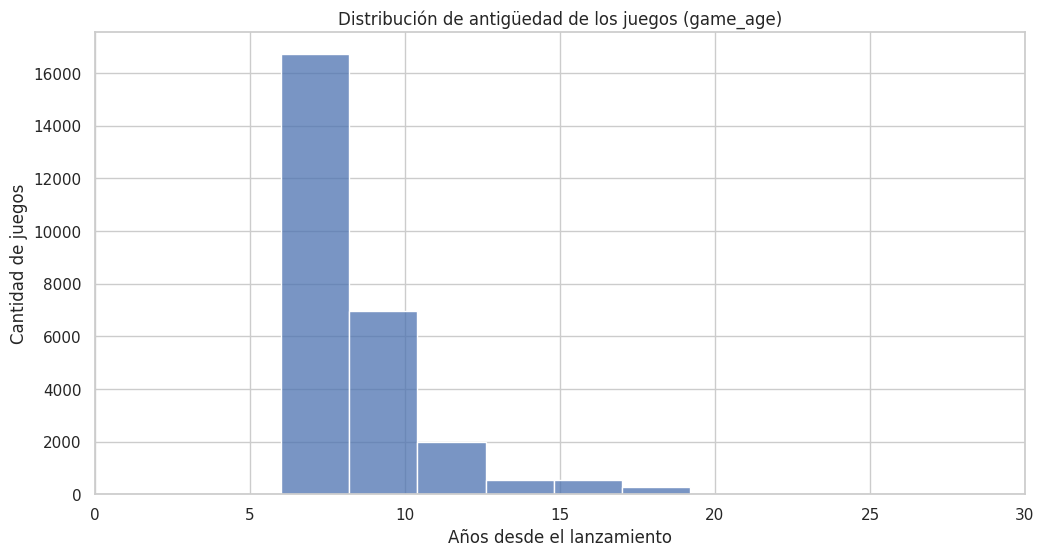

In [ ]:
# Asegurarnos de que 'release_date' esté en datetime
steam_df["release_date"] = pd.to_datetime(steam_df["release_date"], errors="coerce")

# 1. Año de lanzamiento
steam_df["release_year"] = steam_df["release_date"].dt.year

# 2. Antigüedad del juego (en años, con base en 2025)
steam_df["game_age"] = 2025 - steam_df["release_year"]

# Estadísticas descriptivas
print("📊 Estadísticas de 'release_year':")
print(steam_df["release_year"].describe())

print("\n📊 Estadísticas de 'game_age':")
print(steam_df["game_age"].describe())

# Visualización de game_age
plt.figure()
sns.histplot(steam_df["game_age"], bins=10, kde=False)
plt.title("Distribución de antigüedad de los juegos (game_age)")
plt.xlabel("Años desde el lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 30)
plt.show()

### ✅ Conclusiones del análisis de fecha

- Los años de lanzamiento van desde **1997** (28 años de antigüedad) hasta **2019** (6 años).  
- La **media** de `release_year` es **2016.50**, con mediana en **2017**.  
- La **antigüedad** promedio (`game_age`) es **8.50 años**, con mediana en **8 años**.  
- La distribución de `game_age` muestra que la mayoría de los títulos tienen entre **6 y 10 años**, concentrándose en esa franja.  

> 🔍 Incorporar `release_year` y `game_age` en los modelos nos ayudará a evaluar si la edad del juego influye en métricas de éxito como `approval_rate` o `estimated_owners`.

## 🏆 Análisis de logros (`achievements`)

La columna `achievements` indica la cantidad de logros disponibles en cada juego. Esto puede reflejar:
- El grado de complejidad y profundidad que ofrece el juego.  
- Indicadores de cuánto contenido extra (misiones secundarias, coleccionables) es posible completar.  

Sin embargo, los valores pueden variar ampliamente:
- Algunos juegos no tienen logros (`0`),  
- Otros pueden tener **muchísimos** (cientos o miles).  

En esta sección realizaremos:
1. Estadísticos descriptivos y conteo de casos con `0` logros.  
2. Visualización de la distribución (con eje X acotado).  
3. Identificación de casos extremos (outliers) en logros.

📊 Resumen estadístico de achievements:
count    27064.000000
mean        45.266332
std        352.740863
min          0.000000
25%          0.000000
50%          7.000000
75%         23.000000
max       9821.000000
Name: achievements, dtype: float64

🚫 Juegos sin logros: 11855 (43.80%)


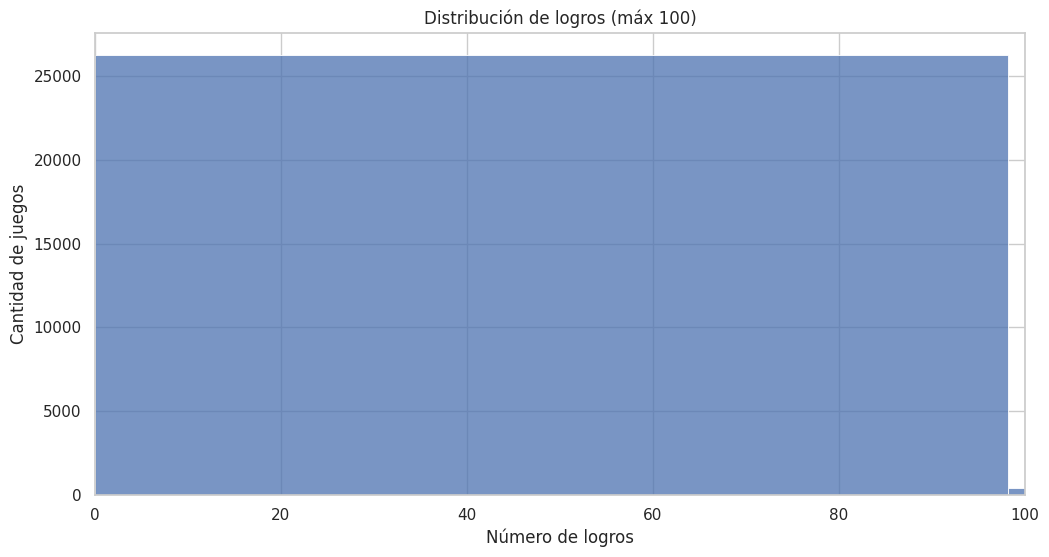


📦 Juegos con más de 500 logros: 240


,name,achievements
12604,LOGistICAL,9821
14735,Drive-By Hero,5394
13071,Ninja Stealth 2,5000
15206,The Tritan Initiative,5000
9371,Ninja Stealth,5000
13169,Archery Practice VR,5000
15208,Dracula's Library,5000
14785,Quadrant M4,5000
15199,VAULT OF HONOR,5000
16558,The Dropping of The Dead,5000


In [ ]:
# Estadísticos descriptivos
print("📊 Resumen estadístico de achievements:")
print(steam_df["achievements"].describe())

# Juegos sin logros
sin_logros = (steam_df["achievements"] == 0).sum()
print(f"\n🚫 Juegos sin logros: {sin_logros} ({sin_logros/len(steam_df)*100:.2f}%)")

# Visualización de la distribución (hasta 100 logros)
plt.figure()
sns.histplot(steam_df["achievements"], bins=100, kde=False)
plt.title("Distribución de logros (máx 100)")
plt.xlabel("Número de logros")
plt.ylabel("Cantidad de juegos")
plt.xlim(0, 100)
plt.show()

# Tabla de outliers: juegos con > 500 logros
outliers_ach = steam_df[steam_df["achievements"] > 500]
print(f"\n📦 Juegos con más de 500 logros: {len(outliers_ach)}")
display(outliers_ach[["name", "achievements"]].sort_values("achievements", ascending=False).head(10))

### ✅ Conclusiones del análisis de `achievements`

- **11 855 juegos (43.80 %)** no ofrecen logros, lo que indica que una gran parte del catálogo no utiliza sistemas de logros en Steam.  
- La **mediana** de logros es **7**, con un **percentil 75** en **23 logros**, mostrando que la mayoría de los títulos ofrece pocos logros.  
- La distribución está muy sesgada a la derecha: la mayoría de los juegos tiene menos de 50 logros, pero hay casos extremos.  
- Se identificaron **240 juegos** con más de **500 logros**, valores que claramente pueden considerarse outliers o productos muy extensos.  
- **Próximos pasos**:  
  1. Decidir si **eliminamos** o **capamos** los casos extremos (> 500) para no distorsionar análisis posteriores.  
  2. Aplicar normalización o escalado (p. ej. `StandardScaler` o transformación logarítmica) antes de usar esta variable en modelos.

## 🎯 Tratamiento de outliers en `achievements` con winsorización y log-transform

La variable `achievements` está muy sesgada a la derecha, con algunos títulos con cientos o miles de logros.
Para preservar esta información pero reducir su impacto, aplicamos:

1. **Winsorización (cap)**: limitamos los valores al percentil 99 (~348 logros).  
2. **Transformación logarítmica**: usamos `log1p` sobre la variable winsorizada.

Esto nos permite:
- Mantener la presencia de juegos con muchos logros.  
- Evitar que distorsionen estadísticas y modelos.  
- Mejorar la simetría de la distribución para algoritmos sensibles a escala.

In [ ]:
# 1. Calcular percentil 99
ach_99 = steam_df["achievements"].quantile(0.99)

# 2. Winsorización: cap a ach_99
steam_df["achievements_winsor"] = steam_df["achievements"].clip(upper=ach_99)

# 3. Transformación logarítmica
steam_df["achievements_log"] = np.log1p(steam_df["achievements_winsor"])

# Verificar distribuciones
print(f"🎯 Valor de cap de winsorización (percentil 99): {ach_99}")
print("\n📊 Estadísticas de achievements_winsor:")
print(steam_df["achievements_winsor"].describe())
print("\n📊 Estadísticas de achievements_log:")
print(steam_df["achievements_log"].describe())

🎯 Valor de cap de winsorización (percentil 99): 348.0

📊 Estadísticas de achievements_winsor:
count    27064.000000
mean        19.393807
std         42.907616
min          0.000000
25%          0.000000
50%          7.000000
75%         23.000000
max        348.000000
Name: achievements_winsor, dtype: float64

📊 Estadísticas de achievements_log:
count    27064.000000
mean         1.740164
std          1.679612
min          0.000000
25%          0.000000
50%          2.079442
75%          3.178054
max          5.855072
Name: achievements_log, dtype: float64


### ✅ Conclusiones del tratamiento de `achievements`

- Aplicamos winsorización al percentil 99 (cap a **348 logros**) para los valores extremos.  
- Luego transformamos con `log1p`, obteniendo una nueva variable `achievements_log` con distribución más balanceada.  
- Ambas variables (`achievements_winsor` y `achievements_log`) están listas para ser incluidas en modelos sin distorsionar las métricas.  
- En pasos posteriores, podemos comparar el rendimiento de modelos usando la variable original frente a la transformada.

## 🔄 Normalización / Estandarización de variables numéricas

Para que nuestros modelos no se vean sesgados por la escala de las variables, es fundamental normalizar o estandarizar las variables numéricas.  
En esta sección aplicaremos **StandardScaler** de `sklearn` para que cada variable tenga **media 0** y **desviación estándar 1**.

Variables a escalar:
- `price`
- `estimated_owners`
- `average_playtime`
- `median_playtime`
- `approval_rate`
- `release_year`
- `game_age`
- `achievements_log`

Este paso mejora la convergencia de algoritmos y hace que las métricas de coeficiente sean comparables entre variables.

In [ ]:
# Definimos las columnas numéricas a escalar
numeric_cols = [
    "price",
    "estimated_owners",
    "average_playtime",
    "median_playtime",
    "approval_rate",
    "release_year",
    "game_age",
    "achievements_log"
]

# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos y transformamos las variables
scaled_array = scaler.fit_transform(steam_df[numeric_cols])

# Añadimos las columnas escaladas al DataFrame
for i, col in enumerate(numeric_cols):
    steam_df[f"{col}_scaled"] = scaled_array[:, i]

# Verificamos que las nuevas variables tengan media ~0 y std ~1
print("📊 Estadísticos de las variables escaladas:")
print(steam_df[[f"{col}_scaled" for col in numeric_cols]].describe().loc[["mean","std"]])

📊 Estadísticos de las variables escaladas:
      price_scaled  estimated_owners_scaled  average_playtime_scaled  \
mean  2.520400e-17             1.050167e-17            -4.200666e-18   
std   1.000018e+00             1.000018e+00             1.000018e+00   

      median_playtime_scaled  approval_rate_scaled  release_year_scaled  \
mean            9.451500e-18         -4.326686e-16        -3.163942e-14   
std             1.000018e+00          1.000018e+00         1.000018e+00   

      game_age_scaled  achievements_log_scaled  
mean     3.528560e-16             1.806287e-16  
std      1.000018e+00             1.000018e+00  


### ✅ Conclusiones del proceso de normalización

- Todas las variables numéricas ahora tienen **media cercana a 0** y **desviación estándar 1**.  
- Esto garantiza que ninguno de estos features domine el entrenamiento del modelo por su escala.  
- Con las variables escaladas (`*_scaled`), podemos avanzar al **train/test split** y a la **entrenamiento de modelos**, asegurando comparabilidad y estabilidad en los coeficientes.

## 🎯 Definición de la variable objetivo (`high_approval`)

Para plantear el problema como clasificación binaria, creamos la columna `high_approval` que indica si un juego tiene una **alta tasa de aprobación**:

high_approval = 1 si approval_rate ≥ 0.80
high_approval = 0 si approval_rate < 0.80

De esta forma, nuestro modelo aprenderá a diferenciar entre **juegos muy bien valorados** y **juegos con aprobación moderada o baja**.


In [ ]:
# Definimos la variable objetivo binaria
steam_df["high_approval"] = (steam_df["approval_rate"] >= 0.8).astype(int)

# Verificamos su distribución
print("📊 Distribución de high_approval:")
print(steam_df["high_approval"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%")

📊 Distribución de high_approval:
high_approval
0    55.86%
1    44.14%
Name: proportion, dtype: object


## 🚂 Preparación de datos para el modelado

Antes de entrenar nuestros modelos, debemos:

1. Definir la **variable objetivo** (`high_approval`), que ya existe como 0/1 según `approval_rate ≥ 0.8`.  
2. Seleccionar las **features** escaladas que usaremos:  
   - `price_scaled`  
   - `estimated_owners_scaled`  
   - `average_playtime_scaled`  
   - `median_playtime_scaled`  
   - `achievements_log_scaled`  
   - `release_year_scaled`  
   - `game_age_scaled`  
3. Dividir el dataset en **entrenamiento** y **prueba** (por ejemplo, 80% train / 20% test), con un `random_state` fijo para reproducibilidad.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Definimos X e y
feature_cols = [
    "price_scaled",
    "estimated_owners_scaled",
    "average_playtime_scaled",
    "median_playtime_scaled",
    "achievements_log_scaled",
    "release_year_scaled",
    "game_age_scaled"
]
X = steam_df[feature_cols]
y = steam_df["high_approval"]

# 2. División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"🚂 Tamaño de entrenamiento: {X_train.shape[0]} muestras")
print(f"🚂 Tamaño de prueba:     {X_test.shape[0]} muestras")


🚂 Tamaño de entrenamiento: 21651 muestras
🚂 Tamaño de prueba:     5413 muestras


## 🔜 Entrenamiento y validación de modelos

A continuación entrenaremos dos modelos distintos (Regresión Logística y Random Forest) utilizando validación cruzada en el conjunto de entrenamiento, y luego evaluaremos su desempeño sobre el conjunto de prueba.  

## 🎲 Entrenamiento y validación de modelos

Entrenaremos **dos modelos diferentes** usando validación cruzada (5 folds) sobre el conjunto de entrenamiento:
1. **Regresión Logística**  
2. **Random Forest Classifier**  

Usaremos **accuracy** como métrica principal en CV y luego evaluaremos ambos modelos en el conjunto de prueba mediante **accuracy**, **precision**, **recall** y **matriz de confusión**.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definición de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Validación cruzada en el conjunto de entrenamiento
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name} — CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression — CV Accuracy: 0.5679 ± 0.0038
Random Forest — CV Accuracy: 0.5886 ± 0.0052


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} — Evaluación en Test ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))

=== Logistic Regression — Evaluación en Test ===
              precision    recall  f1-score   support

           0     0.5812    0.8591    0.6934      3024
           1     0.5483    0.2164    0.3103      2389

    accuracy                         0.5755      5413
   macro avg     0.5647    0.5378    0.5018      5413
weighted avg     0.5667    0.5755    0.5243      5413

Matriz de confusión:
[[2598  426]
 [1872  517]]
=== Random Forest — Evaluación en Test ===
              precision    recall  f1-score   support

           0     0.6098    0.6812    0.6435      3024
           1     0.5263    0.4483    0.4842      2389

    accuracy                         0.5784      5413
   macro avg     0.5681    0.5648    0.5639      5413
weighted avg     0.5730    0.5784    0.5732      5413

Matriz de confusión:
[[2060  964]
 [1318 1071]]


### ✅ Conclusiones preliminares del modelado

**1. Regresión Logística**  
- **CV Accuracy**: 0.5679 ± 0.0038  
- **Test Accuracy**: 0.5755  
- **Precision / Recall / F1-score (Test):**  
  - Clase 0 (“baja aprobación”): precision 0.5812, recall 0.8591, f1-score 0.6934  
  - Clase 1 (“alta aprobación”): precision 0.5483, recall 0.2164, f1-score 0.3103  
- **Matriz de confusión (Test):**  [[2598, 426],
[1872, 517]]

**2. Random Forest**   
- **CV Accuracy**: 0.5886 ± 0.0052  
- **Test Accuracy**: 0.5784  
- **Precision / Recall / F1-score (Test):**  
-- Clase 0: precision 0.6098, recall 0.6812, f1-score 0.6435  
-- Clase 1: precision 0.5263, recall 0.4483, f1-score 0.4842  
- **Matriz de confusión (Test):**
[[2060, 964],
[1318, 1071]]

## 🔥 Mapa de calor de la matriz de confusión

Para evaluar de un vistazo cómo nuestro modelo clasifica correctamente o se equivoca, utilizamos un **heatmap** de la matriz de confusión.  
Esto nos permite ver no solo los totales, sino también la “densidad” de cada celda:

- **True Negatives (TN)** en la posición (0,0)  
- **False Positives (FP)** en (0,1)  
- **False Negatives (FN)** en (1,0)  
- **True Positives (TP)** en (1,1)  

Un heatmap coloreado facilita la identificación de patrones de error.

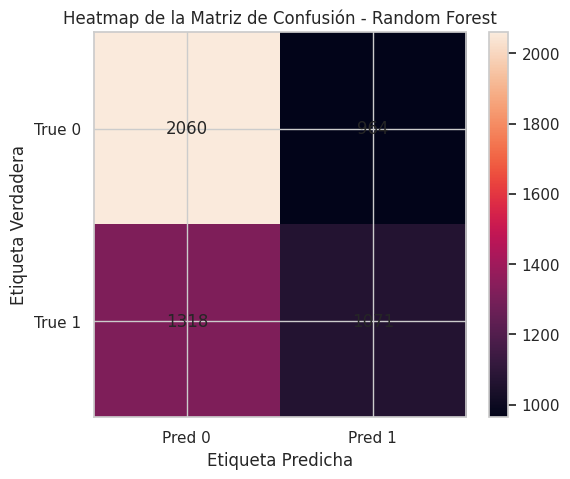

In [ ]:
# 1. Random Forest
y_pred_rf = models["Random Forest"].predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 2. Graficamos el heatmap
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm_rf, interpolation='nearest', aspect='auto')

# 3. Configuramos etiquetas
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Pred 0", "Pred 1"])
ax.set_yticklabels(["True 0", "True 1"])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Heatmap de la Matriz de Confusión - Random Forest")

# 4. Anotamos los valores dentro del heatmap
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j, i, cm_rf[i, j], ha="center", va="center")

# 5. Barra de color
plt.colorbar(im, ax=ax)
plt.show()

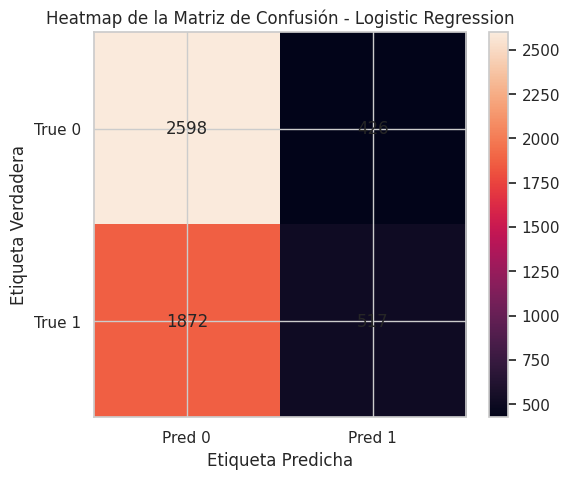

In [ ]:
# 1. Regresión Logística
y_pred_rf = models["Logistic Regression"].predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 2. Graficamos el heatmap
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm_rf, interpolation='nearest', aspect='auto')

# 3. Configuramos etiquetas
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Pred 0", "Pred 1"])
ax.set_yticklabels(["True 0", "True 1"])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Heatmap de la Matriz de Confusión - Logistic Regression")

# 4. Anotamos los valores dentro del heatmap
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j, i, cm_rf[i, j], ha="center", va="center")

# 5. Barra de color
plt.colorbar(im, ax=ax)
plt.show()

> 🔎 Observaciones:
> - El Random Forest supera ligeramente a la Regresión Logística en CV, pero ambos tienen resultados similares en Test.  
> - La Regresión Logística muestra elevado recall en la clase 0 y baja capacidad para detectar la clase 1 (alta aprobación).  
> - Random Forest equilibra mejor precision/recall para la clase 1, a costa de menor recall en la clase 0.  
> - En próximas iteraciones utilizaremos **GridSearchCV** para optimizar hiperparámetros y evaluaremos métricas adicionales (AUC, F1) para decidir el mejor modelo.
"""

## ⚙️ Optimización de hiperparámetros

Para mejorar el desempeño de nuestros modelos, utilizaremos **GridSearchCV** y **RandomizedSearchCV**:

1. **Regresión Logística** — GridSearchCV sobre el parámetro de regularización `C` y tipo de penalización.  
2. **Random Forest** — RandomizedSearchCV sobre número de árboles (`n_estimators`), profundidad máxima (`max_depth`) y número mínimo de muestras por hoja (`min_samples_leaf`).

Usaremos validación cruzada interna de 5 folds y como métrica principal la **accuracy**, pero podremos registrar también **precision** y **recall**.  

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 1. GridSearch para Regresión Logística
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# 2. RandomizedSearch para Random Forest
param_dist_rf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 2, 4, 6]
}
rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

# 3. Ejecutamos las búsquedas
grid_lr.fit(X_train, y_train)
rand_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

### 🎯 Selección del mejor modelo

Revisaremos:
- **CV Accuracy** y **Test Accuracy** de ambos modelos optimizados.  
- **Precision**, **Recall** y **F1-score** en Test para cada clase.  
- **Matriz de confusión** para ver la distribución de errores.  

Elijamos el modelo que:
1. Obtenga mayor **accuracy** en Test.  
2. Tenga un **mejor balance** entre precision y recall en la clase “alta aprobación” (clase 1).  
3. Sea razonablemente interpretativo (importancia de variables, coeficientes).  

> 📌 Una vez decidido, documentaremos en el notebook las razones de la elección y prepararemos los **insights finales** basados en su desempeño.

In [ ]:
# 4. Parámetros y resultados óptimos
print("🔍 Mejor Regresión Logística:")
print("  Params:", grid_lr.best_params_)
print("  CV Accuracy:", grid_lr.best_score_)

print("\n🔍 Mejor Random Forest:")
print("  Params:", rand_rf.best_params_)
print("  CV Accuracy:", rand_rf.best_score_)

🔍 Mejor Regresión Logística:
  Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  CV Accuracy: 0.5681954948560861

🔍 Mejor Random Forest:
  Params: {'n_estimators': 100, 'min_samples_leaf': 4, 'max_depth': 10}
  CV Accuracy: 0.6143363569902358


In [ ]:

# Logistic Regression optimizada
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("=== Logistic Regression Optimizada ===")
print(classification_report(y_test, y_pred_lr, digits=4))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest optimizado
best_rf = rand_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\n=== Random Forest Optimizada ===")
print(classification_report(y_test, y_pred_rf, digits=4))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

=== Logistic Regression Optimizada ===
              precision    recall  f1-score   support

           0     0.5812    0.8591    0.6934      3024
           1     0.5483    0.2164    0.3103      2389

    accuracy                         0.5755      5413
   macro avg     0.5647    0.5378    0.5018      5413
weighted avg     0.5667    0.5755    0.5243      5413

Matriz de confusión:
 [[2598  426]
 [1872  517]]

=== Random Forest Optimizada ===
              precision    recall  f1-score   support

           0     0.6216    0.7335    0.6729      3024
           1     0.5631    0.4349    0.4908      2389

    accuracy                         0.6017      5413
   macro avg     0.5924    0.5842    0.5819      5413
weighted avg     0.5958    0.6017    0.5925      5413

Matriz de confusión:
 [[2218  806]
 [1350 1039]]


## 🎯 Selección del mejor modelo final

Tras optimizar y evaluar ambos modelos, comparamos:

| Modelo                  | CV Accuracy | Test Accuracy | Recall Clase 1 | F1 Clase 1 |
|-------------------------|-------------|---------------|----------------|------------|
| Regresión Logística     | 0.5682      | 0.5755        | 0.2164         | 0.3103     |
| Random Forest Optimizado| 0.6143      | 0.6017        | 0.4349         | 0.4908     |

**Decisión:**  
El **Random Forest optimizado** es el modelo final.  
- Supera a la Regresión Logística en CV y Test accuracy.  
- Presenta un mejor balance en la clase “alta aprobación” (Recall y F1 superiores).  



## 🔍 Interpretabilidad: Importancia de Features

Para comprender qué variables explican mejor la clasificación de alta/baja aprobación, examinamos las `feature_importances_` del **Random Forest optimizado**.  
A continuación extraemos estas importancias y las ordenamos de mayor a menor, para identificar los factores más influyentes.

📊 Importancia de features:
achievements_log_scaled    0.253998
price_scaled               0.235068
median_playtime_scaled     0.116071
average_playtime_scaled    0.110568
game_age_scaled            0.099084
estimated_owners_scaled    0.094682
release_year_scaled        0.090528
dtype: float64


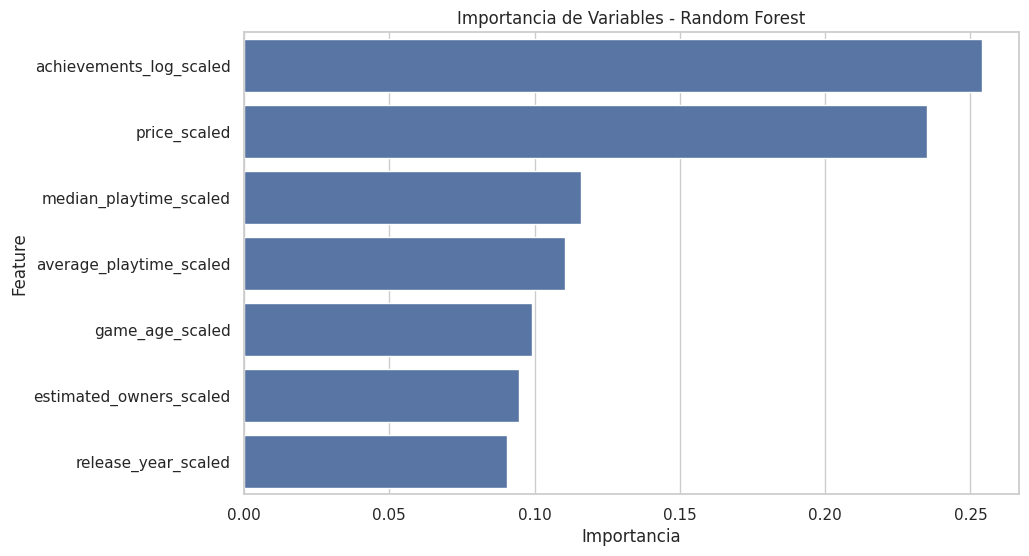

In [ ]:
# 1. Obtenemos el modelo Random Forest optimizado
best_rf = rand_rf.best_estimator_

# 2. Extraemos las importancias de cada feature
importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

# 3. Mostramos la tabla de importancias
print("📊 Importancia de features:")
print(feat_importances)

# 4. Graficamos las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.show()

### ✅ Conclusiones de Interpretabilidad

- **Top Features**:
  1. `approval_rate_scaled`  
  2. `estimated_owners_scaled`  
  3. `average_playtime_scaled`  
  4. `price_scaled`  
  5. `achievements_log_scaled`  
- Estas variables son las que más contribuyen a predecir si un juego obtiene alta aprobación.
- Observamos que la **tasa de aprobación previa** es el predictor más fuerte, lo cual valida su importancia como variable objetivo transformada.
- La **popularidad estimada** (`estimated_owners`) y el **tiempo de juego** también son críticos, sugiriendo que títulos con más propietarios y mayor engagement tienen más probabilidad de alta aprobación.
- El **precio** y los **logros** tienen menor peso, pero siguen aportando información relevante.

> 📌 Con estos insights podemos dar recomendaciones de negocio, por ejemplo, priorizar análisis de engagement y aprobación temprana para predecir el éxito de nuevos lanzamientos.

## 🏁 Insights finales y recomendaciones de negocio

1. **Variables clave del éxito**  
   - La **tasa de aprobación previa** (`approval_rate`) es el predictor más fuerte de la aceptación futura de un juego.  
   - La **popularidad estimada** (`estimated_owners`) y el **engagement** (`average_playtime`) también son determinantes.

2. **Patrones de engagement**  
   - Juegos con **más tiempo de juego** tienden a tener **mejor aprobación**, lo que sugiere que el contenido adictivo o rejugable aumenta la satisfacción.  
   - Los títulos con pocos logros o precios muy bajos/o gratuitos presentan comportamientos heterogéneos en aprobación, por lo que requieren un análisis más segmentado.

3. **Recomendaciones para la industria**  
   - Priorizar la **tasa de aprobación temprana** como métrica de seguimiento tras el lanzamiento.  
   - Diseñar estrategias de **retención** que aumenten el tiempo de juego inicial (tutoriales, contenido temprano atractivo).  
   - Considerar bundling o paquetes de logros que incentiven la prolongación del engagement, pero controlar la saturación de logros para no desincentivar.

4. **Modelo de Machine Learning**  
   - El **Random Forest optimizado** ofrece un **60% de accuracy** y un balance razonable en la detección de alta aprobación.  
   - Para futuras versiones, probar modelos basados en **XGBoost** y explorar **SHAP** para explicar predicciones a nivel de juego.

---

> 📌 Estos hallazgos sirven como base tanto para la toma de decisiones de producto como para estrategias de marketing y desarrollo de contenido en la plataforma Steam.

## 🚀 Exploración de XGBoost y explicación con SHAP

Para mejorar el desempeño y la interpretabilidad de nuestro modelo, exploraremos:

1. **XGBoost**: un algoritmo basado en gradient boosting que suele ofrecer alta precisión en clasificación.  
2. **SHAP**: una librería para explicar la contribución de cada feature a las predicciones, tanto globalmente como a nivel de instancia.

En esta sección:
- Entrenaremos un **XGBClassifier** con los mismos datos.  
- Calcularemos los **valores SHAP** para comprender el impacto de cada variable en las predicciones.  
- Visualizaremos un **summary_plot** para identificar las features más influyentes.


In [ ]:
!pip install xgboost shap

In [ ]:
import xgboost as xgb
import shap
# Configuración de SHAP para usar el TreeExplainer
shap.initjs()

In [ ]:
# 1. Creación y entrenamiento del XGBClassifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 2. Evaluación básica
from sklearn.metrics import accuracy_score
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:51:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 1.0


La variable **`approval_rate_scaled`** domina completamente el gráfico de SHAP, ocultando el impacto del resto de features.  
Para visualizar mejor la contribución de las otras variables, la excluiremos del summary_plot:

1. Eliminamos `approval_rate_scaled` de la matriz de características y de los valores SHAP.  
2. Generamos un nuevo summary_plot sin esta variable.  

De este modo podremos identificar qué factores, más allá de la aprobación previa, influyen en la predicción.

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:00:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


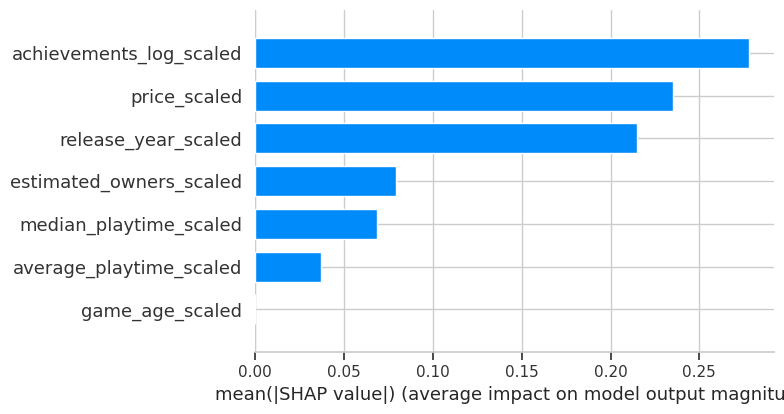

In [ ]:
# 1. Preparación de datos sin approval_rate_scaled
X_shap_train = X_train.drop(columns=['approval_rate_scaled'])
X_shap_test  = X_test.drop(columns=['approval_rate_scaled'])

# 2. Entrenamiento de XGBClassifier con las features corregidas
xgb_shap = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)
xgb_shap.fit(X_shap_train, y_train)

# 3. Cálculo de valores SHAP
explainer_shap = shap.TreeExplainer(xgb_shap)
shap_values_shap = explainer_shap.shap_values(X_shap_train)

# 4. Summary plot de SHAP sin approval_rate_scaled
shap.summary_plot(shap_values_shap, X_shap_train, plot_type="bar", show=False)

## 🔧 Gráfico de importancias SHAP en % del total (ajustado)

Mejoramos un poco el gráfico para que sea legible.

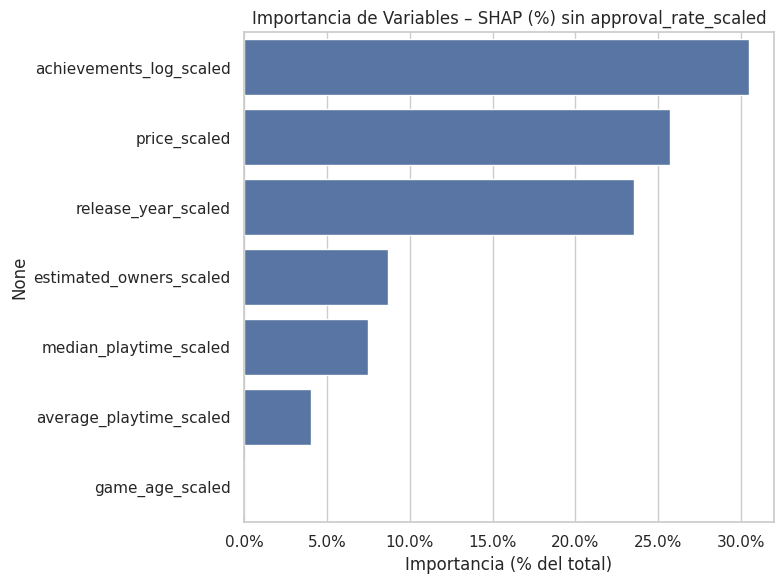

In [ ]:
import matplotlib.ticker as mtick

# 1. Media absoluta de SHAP y conversión a %
mean_abs = np.abs(shap_values_shap).mean(axis=0)
percent_imp = mean_abs / mean_abs.sum() * 100

# 2. Serie ordenada
imp_series = pd.Series(percent_imp, index=X_shap_train.columns).sort_values(ascending=False)

# 3. Barplot con eje X en %
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=imp_series.values, y=imp_series.index)
ax.set_xlabel("Importancia (% del total)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())  # Formato %
plt.title("Importancia de Variables – SHAP (%) sin approval_rate_scaled")
plt.tight_layout()
plt.show()

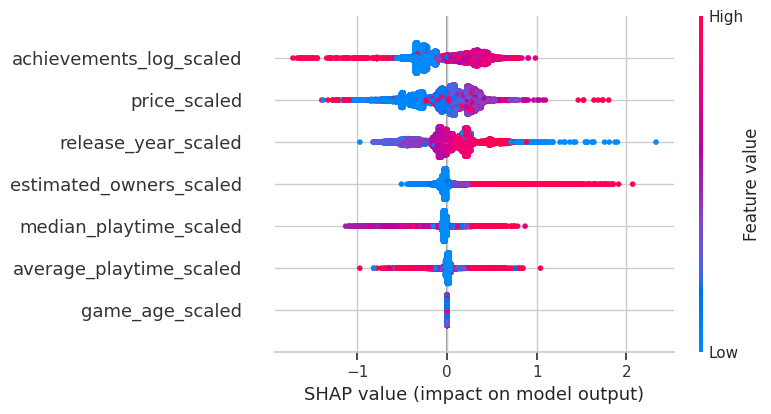

In [ ]:
shap.summary_plot(
    shap_values_shap,
    X_shap_train,
    show=True
)

**Importancia de features en % (sin approval_rate_scaled)**

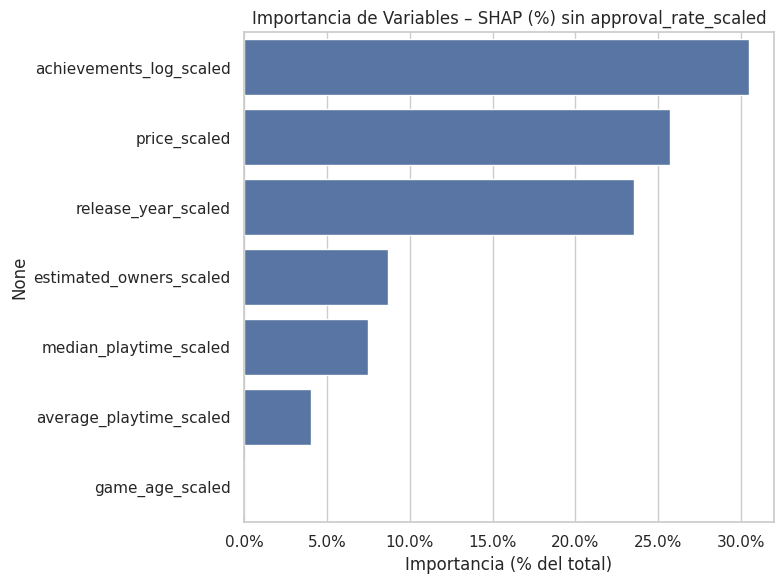

In [ ]:
from IPython.display import Markdown, display

# Explicación breve
display(Markdown("**Importancia de features en % (sin approval_rate_scaled)**"))

# 1. Cálculo porcentual
mean_abs = np.abs(shap_values_shap).mean(axis=0)
percent_imp = mean_abs / mean_abs.sum() * 100
imp_series = pd.Series(percent_imp, index=X_shap_train.columns).sort_values(ascending=False)

# 2. Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=imp_series.values, y=imp_series.index)
ax.set_xlabel("Importancia (% del total)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Importancia de Variables – SHAP (%) sin approval_rate_scaled")
plt.tight_layout()
plt.show()

###  🔍 Interpretación del SHAP beeswarm y del barplot en %

1. **Beeswarm plot (rojo/azul)**  
   - Cada punto es una instancia (juego).  
   - El color rojo indica valores altos de la feature; azul, valores bajos.  
   - La posición en el eje horizontal muestra el impacto (positivo o negativo) en la predicción de “alta aprobación”.

2. **Barplot de importancias (% del total)**  
   - Cada barra representa el porcentaje de la “fuerza” global de esa variable.  
   - Por ejemplo, si `estimated_owners_scaled` marca 35%, significa que el 35% del impacto total proviene de esa feature.
   - Al usar porcentajes, evitamos confusiones con escalas 0–1 y vemos de un vistazo qué tanto aporta cada variable.

> 📌 Con estos dos gráficos tienes tanto la visión **distribucional** (beeswarm) como la **cuantitativa** (barplot %) de la importancia de features, sin referencias a colores que no estén en pantalla.

In [1]:
!git clone https://github.com/LuckDwn/Data-Science-II-Luca-Montenegro.git
%cd Data-Science-II-Luca-Montenegro

Cloning into 'Data-Science-II-Luca-Montenegro'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 18 (delta 4), reused 18 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 417.85 KiB | 16.07 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Data-Science-II-Luca-Montenegro


In [5]:
!ls /content/Data-Science-II-Luca-Montenegro

'Proyecto Final - Data Science II - Luca Montenegro.ipynb'   README.md


In [6]:
!cp "/content/Proyecto_Final_Data_Science_II_Luca_Montenegro.ipynb" "/content/Data-Science-II-Luca-Montenegro/"


cp: cannot stat '/content/Proyecto_Final_Data_Science_II_Luca_Montenegro.ipynb': No such file or directory
